In [1]:
# !pip install nba_api
# !pip install openpyxl
# !pip install pyforest
import pandas as pd

In [2]:
import pandas as pd
from pyforest import *

master_train_df = pd.read_csv('/workspaces/707-group-project-aadit2697/project-checkpoint2/master_data/all_seasons_v2.csv')
master_test_df= pd.read_excel('/workspaces/707-group-project-aadit2697/project-checkpoint2/master_data/season2023_testdata_mastertable.xlsx')
print(master_train_df.shape)
print(master_test_df.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(481311, 59)
(55164, 59)


In [3]:
renamed_columns_for_train = {
    'Team_ID': 'team_id', 
    'Game_ID': 'game_id',
    'PLAYER_ID': 'player_id',
    'GAME_DATE': 'game_date',
    'MATCHUP': 'matchup',
    'W': 'team_wins', # per game
    'L': 'team_losses', # per game
    'W_PCT': 'team_win_percentage',
    'MIN_x': 'team_minutes_played',
    'FGM': 'team_field_goals_made',
    'FGA': 'team_field_goals_attempted',
    'FG_PCT': 'team_field_goal_percentage',
    'FG3M': 'team_three_points_made',
    'FG3A': 'team_three_points_attempted',
    'FG3_PCT': 'team_three_point_percentage',
    'FTM': 'team_free_throws_made',
    'FTA': 'team_free_throws_attempted',
    'FT_PCT': 'team_free_throw_percentage',
    'OREB': 'team_offensive_rebounds',
    'DREB': 'team_defensive_rebounds',
    'REB': 'team_total_rebounds',
    'AST': 'team_assists',
    'STL': 'team_steals',
    'BLK': 'team_blocks',
    'TOV': 'team_turnovers',
    'PF': 'team_personal_fouls',
    'PTS': 'team_points',
    'TEAM_ABBREVIATION': 'team_abbreviation',
    'TEAM_CITY': 'team_city',
    'PLAYER_NAME': 'player_name',
    'NICKNAME': 'nickname',
    'START_POSITION': 'start_position',
    'COMMENT': 'comment',
    'MIN_y': 'minutes_played_player_per_game',
    'E_OFF_RATING': 'estimated_offensive_rating',
    'OFF_RATING': 'offensive_rating',
    'E_DEF_RATING': 'estimated_defensive_rating',
    'DEF_RATING': 'defensive_rating',
    'E_NET_RATING': 'estimated_net_rating',
    'NET_RATING': 'net_rating',
    'AST_PCT': 'assist_percentage',
    'AST_TOV': 'assist_to_turnover_ratio',
    'AST_RATIO': 'assist_ratio',
    'OREB_PCT': 'offensive_rebound_percentage',
    'DREB_PCT': 'defensive_rebound_percentage',
    'REB_PCT': 'rebound_percentage',
    'TM_TOV_PCT': 'team_turnover_percentage',
    'EFG_PCT': 'effective_field_goal_percentage',
    'TS_PCT': 'true_shooting_percentage',
    'USG_PCT': 'usage_percentage',
    'E_USG_PCT': 'estimated_usage_percentage',
    'E_PACE': 'estimated_pace',
    'PACE': 'pace', 
    'PACE_PER40': 'pace_per_40_minutes',
    'POSS': 'possessions',
    'PIE': 'player_impact_estimate',
    'WL': 'win_loss'
}

In [4]:
master_train_df.rename(columns=renamed_columns_for_train, inplace=True)
master_test_df.rename(columns=renamed_columns_for_train, inplace=True)
master_train_df.head()

,team_id,game_id,game_date,matchup,win_loss,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,...,team_turnover_percentage,effective_field_goal_percentage,true_shooting_percentage,usage_percentage,estimated_usage_percentage,estimated_pace,pace,pace_per_40_minutes,possessions,player_impact_estimate
0,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,6.5,0.545,0.546,0.357,0.360,109.99,106.60,88.83,60,0.182
1,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,6.3,0.417,0.478,0.195,0.198,106.36,102.23,85.20,65,0.087
2,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,13.3,0.545,0.528,0.263,0.270,111.96,107.26,89.38,47,0.145
3,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.0,0.625,0.625,0.121,0.119,106.92,101.30,84.41,58,0.089
4,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.0,0.545,0.545,0.169,0.175,100.63,99.02,82.52,59,0.089


In [5]:
"""import numpy as np

temp_df_for_win_loss_binary =master_train_df.copy()
temp_df_for_win_loss_binary.win_loss =np.where(temp_df_for_win_loss_binary.win_loss=="W",1,0)

top_4_teams = temp_df_for_win_loss_binary.sort_values(by='team_wins', ascending=False).head(4)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='team_id', y='win_loss', data=top_4_teams, hue='team_id', legend=False)
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Number of Wins for Top 4 Teams')
plt.show()"""

'import numpy as np\n\ntemp_df_for_win_loss_binary =master_train_df.copy()\ntemp_df_for_win_loss_binary.win_loss =np.where(temp_df_for_win_loss_binary.win_loss=="W",1,0)\n\ntop_4_teams = temp_df_for_win_loss_binary.sort_values(by=\'team_wins\', ascending=False).head(4)\n\n# Plot\nplt.figure(figsize=(10, 6))\nsns.barplot(x=\'team_id\', y=\'win_loss\', data=top_4_teams, hue=\'team_id\', legend=False)\nplt.xlabel(\'Team\')\nplt.ylabel(\'Number of Wins\')\nplt.title(\'Number of Wins for Top 4 Teams\')\nplt.show()'

In [6]:
master_train_df_without_dupe=master_train_df[~master_train_df.duplicated()]
master_test_df_without_dupe=master_test_df[~master_test_df.duplicated()]

In [7]:
print(master_train_df.shape)
print(master_train_df_without_dupe.shape)

print(master_test_df.shape)
print(master_test_df_without_dupe.shape)

(481311, 59)
(454697, 59)
(55164, 59)
(55164, 59)


In [8]:
data_types = master_test_df_without_dupe.dtypes

# Count the occurrences of each data type
data_type_counts = data_types.value_counts()

print("Data Type Counts:")
print(data_type_counts)

Data Type Counts:
float64    27
int64      22
object     10
Name: count, dtype: int64


In [9]:
master_train_df_without_dupe.columns

Index(['team_id', 'game_id', 'game_date', 'matchup', 'win_loss', 'team_wins',
       'team_losses', 'team_win_percentage', 'team_minutes_played',
       'team_field_goals_made', 'team_field_goals_attempted',
       'team_field_goal_percentage', 'team_three_points_made',
       'team_three_points_attempted', 'team_three_point_percentage',
       'team_free_throws_made', 'team_free_throws_attempted',
       'team_free_throw_percentage', 'team_offensive_rebounds',
       'team_defensive_rebounds', 'team_total_rebounds', 'team_assists',
       'team_steals', 'team_blocks', 'team_turnovers', 'team_personal_fouls',
       'team_points', 'GAME_ID', 'TEAM_ID', 'team_abbreviation', 'team_city',
       'player_id', 'player_name', 'nickname', 'start_position', 'comment',
       'minutes_played_player_per_game', 'estimated_offensive_rating',
       'offensive_rating', 'estimated_defensive_rating', 'defensive_rating',
       'estimated_net_rating', 'net_rating', 'assist_percentage',
       'assist_

In [10]:
# master_train_df_without_dupe_wo_team = master_train_df_without_dupe

master_train_df_without_dupe_wo_team = master_train_df_without_dupe.drop(
    [
    #'team_wins','team_losses', 'team_win_percentage', 'team_minutes_played',
       #'team_field_goals_made', 'team_field_goals_attempted',
       #'team_field_goal_percentage', 
       'team_three_points_made',
       'team_three_points_attempted', 'team_three_point_percentage',
       'team_free_throws_made', 'team_free_throws_attempted',
       'team_free_throw_percentage', 'team_offensive_rebounds',
       #'team_defensive_rebounds', 'team_total_rebounds', 'team_assists',
       'team_steals', 'team_blocks', 'team_turnovers', 'team_personal_fouls',
       'team_points', 'GAME_ID', 'TEAM_ID'], axis=1
)

# master_test_df_without_dupe_wo_team = master_test_df_without_dupe

master_test_df_without_dupe_wo_team = master_test_df_without_dupe.drop(
    [
        #'team_wins','team_losses', 'team_win_percentage', 'team_minutes_played',
       #'team_field_goals_made', 'team_field_goals_attempted',
       #'team_field_goal_percentage', 
       'team_three_points_made',
       'team_three_points_attempted', 'team_three_point_percentage',
       'team_free_throws_made', 'team_free_throws_attempted',
       'team_free_throw_percentage', 'team_offensive_rebounds',
       #'team_defensive_rebounds', 'team_total_rebounds', 'team_assists',
       'team_steals', 'team_blocks', 'team_turnovers', 'team_personal_fouls',
       'team_points', 'GAME_ID', 'TEAM_ID'], axis=1
)

In [11]:
master_train_df_without_dupe_wo_team.isnull().sum()

team_id                                 0
game_id                                 0
game_date                               0
matchup                                 0
win_loss                                0
team_wins                               0
team_losses                             0
team_win_percentage                     0
team_minutes_played                     0
team_field_goals_made                   0
team_field_goals_attempted              0
team_field_goal_percentage              0
team_defensive_rebounds                 0
team_total_rebounds                     0
team_assists                            0
team_abbreviation                       0
team_city                               0
player_id                               0
player_name                             0
nickname                                0
start_position                     276177
comment                            378344
minutes_played_player_per_game      76353
estimated_offensive_rating        

In [12]:
master_train_df_without_dupe_wo_team.isnull().sum()

team_id                                 0
game_id                                 0
game_date                               0
matchup                                 0
win_loss                                0
team_wins                               0
team_losses                             0
team_win_percentage                     0
team_minutes_played                     0
team_field_goals_made                   0
team_field_goals_attempted              0
team_field_goal_percentage              0
team_defensive_rebounds                 0
team_total_rebounds                     0
team_assists                            0
team_abbreviation                       0
team_city                               0
player_id                               0
player_name                             0
nickname                                0
start_position                     276177
comment                            378344
minutes_played_player_per_game      76353
estimated_offensive_rating        

In [13]:
master_test_df_without_dupe_wo_team = master_test_df_without_dupe_wo_team[master_test_df_without_dupe_wo_team.win_loss.notnull()]

In [14]:
master_test_df_without_dupe_wo_team.isnull().sum()

team_id                                0
game_id                                0
game_date                              0
matchup                                0
win_loss                               0
team_wins                              0
team_losses                            0
team_win_percentage                    0
team_minutes_played                    0
team_field_goals_made                  0
team_field_goals_attempted             0
team_field_goal_percentage             0
team_defensive_rebounds                0
team_total_rebounds                    0
team_assists                           0
team_abbreviation                      0
team_city                              0
player_id                              0
player_name                            0
nickname                               0
start_position                     34174
comment                            44897
minutes_played_player_per_game     10217
estimated_offensive_rating         10217
offensive_rating

In [15]:
master_train_df_without_dupe_wo_team.drop('start_position', axis=1, inplace=True)
master_test_df_without_dupe_wo_team.drop('start_position', axis=1, inplace=True)

In [16]:
master_train_df_without_dupe_wo_team.shape[0] - 378344

76353

1. all the variables which starts with estimated will be dropped.
2. dropped start_position
3. all other variables with null values will be filled with 0 except "team_turnover_percentage" as confirmation for data level needs to be done

In [17]:
master_train_df_without_dupe_wo_team.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454697 entries, 0 to 481310
Data columns (total 44 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   team_id                          454697 non-null  int64  
 1   game_id                          454697 non-null  int64  
 2   game_date                        454697 non-null  object 
 3   matchup                          454697 non-null  object 
 4   win_loss                         454697 non-null  object 
 5   team_wins                        454697 non-null  int64  
 6   team_losses                      454697 non-null  int64  
 7   team_win_percentage              454697 non-null  float64
 8   team_minutes_played              454697 non-null  int64  
 9   team_field_goals_made            454697 non-null  int64  
 10  team_field_goals_attempted       454697 non-null  int64  
 11  team_field_goal_percentage       454697 non-null  float64
 12  team_de

In [18]:
master_train_df_without_dupe_wo_team.isnull().sum()

team_id                                 0
game_id                                 0
game_date                               0
matchup                                 0
win_loss                                0
team_wins                               0
team_losses                             0
team_win_percentage                     0
team_minutes_played                     0
team_field_goals_made                   0
team_field_goals_attempted              0
team_field_goal_percentage              0
team_defensive_rebounds                 0
team_total_rebounds                     0
team_assists                            0
team_abbreviation                       0
team_city                               0
player_id                               0
player_name                             0
nickname                                0
comment                            378344
minutes_played_player_per_game      76353
estimated_offensive_rating          76353
offensive_rating                  

In [19]:
master_test_df_without_dupe_wo_team.isnull().sum()

team_id                                0
game_id                                0
game_date                              0
matchup                                0
win_loss                               0
team_wins                              0
team_losses                            0
team_win_percentage                    0
team_minutes_played                    0
team_field_goals_made                  0
team_field_goals_attempted             0
team_field_goal_percentage             0
team_defensive_rebounds                0
team_total_rebounds                    0
team_assists                           0
team_abbreviation                      0
team_city                              0
player_id                              0
player_name                            0
nickname                               0
comment                            44897
minutes_played_player_per_game     10217
estimated_offensive_rating         10217
offensive_rating                       0
estimated_defens

In [20]:
minutes_seconds = master_train_df_without_dupe_wo_team['minutes_played_player_per_game'].str.split(':', expand=True)

# Convert minutes and seconds to float and integer respectively
minutes_seconds[0] = minutes_seconds[0].astype(float).fillna(0)  # Convert minutes to float
minutes_seconds[1] = minutes_seconds[1].astype(float).fillna(0)  # Convert seconds to float

# Calculate the decimal format for seconds and adjust minutes
minutes_seconds[1] = minutes_seconds[1] / 60  # Normalize seconds
master_train_df_without_dupe_wo_team['minutes_played_player_per_game_cln'] = minutes_seconds[0] + round(minutes_seconds[1],2)


In [21]:
minutes_seconds = master_test_df_without_dupe_wo_team['minutes_played_player_per_game'].str.split(':', expand=True)

# Convert minutes and seconds to float and integer respectively
minutes_seconds[0] = minutes_seconds[0].astype(float).fillna(0)  # Convert minutes to float
minutes_seconds[1] = minutes_seconds[1].astype(float).fillna(0)  # Convert seconds to float

# Calculate the decimal format for seconds and adjust minutes
minutes_seconds[1] = minutes_seconds[1] / 60  # Normalize seconds
master_test_df_without_dupe_wo_team['minutes_played_player_per_game_cln'] = minutes_seconds[0] + round(minutes_seconds[1],2)

In [22]:
master_train_df_without_dupe_wo_team[(master_train_df_without_dupe_wo_team.nickname == "LeBron")][['team_id','game_id','player_id',
                                                                                                   'matchup','game_date',
                                                                                                   'minutes_played_player_per_game',
                                                                                                   'minutes_played_player_per_game_cln']]

,team_id,game_id,player_id,matchup,game_date,minutes_played_player_per_game,minutes_played_player_per_game_cln
0,1610612747,22001072,2544,LAL @ NOP,"MAY 16, 2021",27.000000:28,27.47
27,1610612747,22001061,2544,LAL @ IND,"MAY 15, 2021",28.000000:26,28.43
226,1610612747,22000974,2544,LAL vs. TOR,"MAY 02, 2021",27.000000:33,27.55
252,1610612747,22000956,2544,LAL vs. SAC,"APR 30, 2021",31.000000:51,31.85
807,1610612747,22000640,2544,LAL vs. ATL,"MAR 20, 2021",10.000000:36,10.60
...,...,...,...,...,...,...,...
476579,1610612764,22200349,2544,WAS vs. LAL,"DEC 04, 2022",34.000000:27,34.45
478519,1610612765,22200396,2544,DET vs. LAL,"DEC 11, 2022",36.000000:52,36.87
478848,1610612765,22200234,2544,DET @ LAL,"NOV 18, 2022",NaN,0.00
480366,1610612766,22200551,2544,CHA vs. LAL,"JAN 02, 2023",39.000000:34,39.57


In [23]:
master_test_df_without_dupe_wo_team[(master_test_df_without_dupe_wo_team.nickname == "LeBron")][['team_id','game_id','player_id',
                                                                                                   'matchup','game_date',
                                                                                                   'minutes_played_player_per_game',
                                                                                                   'minutes_played_player_per_game_cln']]

,team_id,game_id,player_id,matchup,game_date,minutes_played_player_per_game,minutes_played_player_per_game_cln
39,1610612737,22300990,2544,ATL @ LAL,"MAR 18, 2024",28.000000:39,28.65
545,1610612737,22300669,2544,ATL vs. LAL,"JAN 30, 2024",35.000000:49,35.82
2904,1610612738,22300403,2544,BOS @ LAL,"DEC 25, 2023",36.000000:47,36.78
5004,1610612739,22300242,2544,CLE vs. LAL,"NOV 25, 2023",35.000000:36,35.60
5927,1610612740,22300747,2544,NOP @ LAL,"FEB 09, 2024",37.000000:31,37.52
...,...,...,...,...,...,...,...
50002,1610612764,22300856,2544,WAS @ LAL,"FEB 29, 2024",38.000000:46,38.77
52042,1610612765,22300776,2544,DET @ LAL,"FEB 13, 2024",30.000000:42,30.70
52932,1610612765,22300258,2544,DET vs. LAL,"NOV 29, 2023",28.000000:42,28.70
53907,1610612766,22300713,2544,CHA vs. LAL,"FEB 05, 2024",39.000000:32,39.53


In [24]:
master_train_df_without_dupe_wo_team.drop('minutes_played_player_per_game', axis=1, inplace=True)
master_test_df_without_dupe_wo_team.drop('minutes_played_player_per_game', axis=1, inplace=True)

In [25]:
#variable for identifying whether the match was a home match or not
master_train_df_without_dupe_wo_team['home_away'] = master_train_df_without_dupe_wo_team['matchup'].apply(lambda x: 1 if "vs." in x else 0)
master_test_df_without_dupe_wo_team['home_away'] = master_test_df_without_dupe_wo_team['matchup'].apply(lambda x: 1 if "vs." in x else 0)
master_train_df_without_dupe_wo_team.head()

,team_id,game_id,game_date,matchup,win_loss,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,...,true_shooting_percentage,usage_percentage,estimated_usage_percentage,estimated_pace,pace,pace_per_40_minutes,possessions,player_impact_estimate,minutes_played_player_per_game_cln,home_away
0,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.546,0.357,0.360,109.99,106.60,88.83,60,0.182,27.47,0
1,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.478,0.195,0.198,106.36,102.23,85.20,65,0.087,30.28,0
2,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.528,0.263,0.270,111.96,107.26,89.38,47,0.145,21.03,0
3,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.625,0.121,0.119,106.92,101.30,84.41,58,0.089,27.48,0
4,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.545,0.169,0.175,100.63,99.02,82.52,59,0.089,28.60,0


In [26]:
master_train_df_without_dupe_wo_team.home_away.value_counts()

home_away
1    227391
0    227306
Name: count, dtype: int64

In [27]:
master_test_df_without_dupe_wo_team.home_away.value_counts()

home_away
1    27663
0    27451
Name: count, dtype: int64

In [28]:
master_train_df_without_dupe_wo_team.columns

Index(['team_id', 'game_id', 'game_date', 'matchup', 'win_loss', 'team_wins',
       'team_losses', 'team_win_percentage', 'team_minutes_played',
       'team_field_goals_made', 'team_field_goals_attempted',
       'team_field_goal_percentage', 'team_defensive_rebounds',
       'team_total_rebounds', 'team_assists', 'team_abbreviation', 'team_city',
       'player_id', 'player_name', 'nickname', 'comment',
       'estimated_offensive_rating', 'offensive_rating',
       'estimated_defensive_rating', 'defensive_rating',
       'estimated_net_rating', 'net_rating', 'assist_percentage',
       'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'estimated_usage_percentage', 'estimated_pace',
       'pace', 'pace_per_40_minutes', 'possessions', 'player_impact_estimate',
       

In [29]:
master_train_df_without_dupe_wo_team['status'] = 'injured'

# Specific condition for 'benched'
master_train_df_without_dupe_wo_team.loc[master_train_df_without_dupe_wo_team['comment'].str.contains("Coach's Decision", na=False), 'status'] = 'Did Not Play'

# Handle NaN values
master_train_df_without_dupe_wo_team['status'] = master_train_df_without_dupe_wo_team['status'].where(
    master_train_df_without_dupe_wo_team['comment'].notna(), 'unknown')

master_test_df_without_dupe_wo_team['status'] = 'injured'

# Specific condition for 'benched'
master_test_df_without_dupe_wo_team.loc[master_test_df_without_dupe_wo_team['comment'].str.contains("Coach's Decision", na=False), 'status'] = 'Did Not Play'

# Handle NaN values
master_test_df_without_dupe_wo_team['status'] = master_test_df_without_dupe_wo_team['status'].where(
    master_test_df_without_dupe_wo_team['comment'].notna(), 'unknown')

In [30]:
_=master_train_df_without_dupe_wo_team[master_train_df_without_dupe_wo_team.comment.notnull()][['team_id', 'game_id', 
                                                                                              'game_date', 'matchup', 'win_loss',
                                                                                              'team_abbreviation', 'team_city', 
                                                                                              'player_id', 'player_name',
                                                                                              'comment','status']]

In [31]:
_.head()

,team_id,game_id,game_date,matchup,win_loss,team_abbreviation,team_city,player_id,player_name,comment,status
13,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,LAL,Los Angeles,1626149,Montrezl Harrell,DNP - Coach's Decision,Did Not Play
14,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,LAL,Los Angeles,202693,Markieff Morris,DNP - Coach's Decision,Did Not Play
25,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,NOP,New Orleans,1628366,Lonzo Ball,DND - Injury/Illness,injured
26,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,NOP,New Orleans,1628411,Wes Iwundu,DND - Injury/Illness,injured
37,1610612747,22001061,"MAY 15, 2021",LAL @ IND,W,LAL,Los Angeles,1629719,Devontae Cacok,DNP - Coach's Decision,Did Not Play


In [32]:
_.status.value_counts()

status
Did Not Play    64733
injured         11620
Name: count, dtype: int64

In [33]:
master_train_df_without_dupe_wo_team.columns

Index(['team_id', 'game_id', 'game_date', 'matchup', 'win_loss', 'team_wins',
       'team_losses', 'team_win_percentage', 'team_minutes_played',
       'team_field_goals_made', 'team_field_goals_attempted',
       'team_field_goal_percentage', 'team_defensive_rebounds',
       'team_total_rebounds', 'team_assists', 'team_abbreviation', 'team_city',
       'player_id', 'player_name', 'nickname', 'comment',
       'estimated_offensive_rating', 'offensive_rating',
       'estimated_defensive_rating', 'defensive_rating',
       'estimated_net_rating', 'net_rating', 'assist_percentage',
       'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'estimated_usage_percentage', 'estimated_pace',
       'pace', 'pace_per_40_minutes', 'possessions', 'player_impact_estimate',
       

In [34]:
avg_minutes_train = master_train_df_without_dupe_wo_team['minutes_played_player_per_game_cln'].mean()
avg_minutes_train
master_train_df_without_dupe_wo_team['benched_status'] = (master_train_df_without_dupe_wo_team['minutes_played_player_per_game_cln'] < avg_minutes_train * 0.5).astype(int)

In [35]:
avg_minutes_test = master_test_df_without_dupe_wo_team['minutes_played_player_per_game_cln'].mean()
avg_minutes_test
master_test_df_without_dupe_wo_team['benched_status'] = (master_test_df_without_dupe_wo_team['minutes_played_player_per_game_cln'] < avg_minutes_test * 0.5).astype(int)

In [36]:
master_train_df_without_dupe_wo_team[master_train_df_without_dupe_wo_team.comment.notnull()][['team_id', 'game_id', 
                                                                                              'game_date', 'matchup', 'win_loss',
                                                                                              'team_abbreviation', 'team_city', 
                                                                                              'player_id', 'player_name',
                                                                                              'comment','status','benched_status']]

,team_id,game_id,game_date,matchup,win_loss,team_abbreviation,team_city,player_id,player_name,comment,status,benched_status
13,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,LAL,Los Angeles,1626149,Montrezl Harrell,DNP - Coach's Decision,Did Not Play,1
14,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,LAL,Los Angeles,202693,Markieff Morris,DNP - Coach's Decision,Did Not Play,1
25,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,NOP,New Orleans,1628366,Lonzo Ball,DND - Injury/Illness,injured,1
26,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,NOP,New Orleans,1628411,Wes Iwundu,DND - Injury/Illness,injured,1
37,1610612747,22001061,"MAY 15, 2021",LAL @ IND,W,LAL,Los Angeles,1629719,Devontae Cacok,DNP - Coach's Decision,Did Not Play,1
...,...,...,...,...,...,...,...,...,...,...,...,...
481278,1610612766,22200017,"OCT 21, 2022",CHA vs. NOP,L,CHA,Charlotte,1631121,Bryce McGowens,DNP - Coach's Decision,Did Not Play,1
481279,1610612766,22200017,"OCT 21, 2022",CHA vs. NOP,L,CHA,Charlotte,1630550,JT Thor,DNP - Coach's Decision,Did Not Play,1
481280,1610612766,22200017,"OCT 21, 2022",CHA vs. NOP,L,CHA,Charlotte,1631109,Mark Williams,DNP - Coach's Decision,Did Not Play,1
481309,1610612766,22200011,"OCT 19, 2022",CHA @ SAS,W,SAS,San Antonio,1631103,Malaki Branham,DNP - Coach's Decision,Did Not Play,1


In [37]:
master_train_df_without_dupe_wo_team.win_loss.value_counts()

win_loss
L    227502
W    227195
Name: count, dtype: int64

In [38]:
master_train_df_without_dupe_wo_team.home_away.value_counts()

home_away
1    227391
0    227306
Name: count, dtype: int64

In [39]:
master_train_df_without_dupe_wo_team.status.value_counts()

status
unknown         378344
Did Not Play     64733
injured          11620
Name: count, dtype: int64

In [40]:
master_train_df_without_dupe_wo_team.benched_status.value_counts()

benched_status
0    328365
1    126332
Name: count, dtype: int64

In [41]:
master_test_df_without_dupe_wo_team.benched_status.value_counts()

benched_status
0    38051
1    17063
Name: count, dtype: int64

In [42]:
master_train_df_without_dupe_wo_team.columns

Index(['team_id', 'game_id', 'game_date', 'matchup', 'win_loss', 'team_wins',
       'team_losses', 'team_win_percentage', 'team_minutes_played',
       'team_field_goals_made', 'team_field_goals_attempted',
       'team_field_goal_percentage', 'team_defensive_rebounds',
       'team_total_rebounds', 'team_assists', 'team_abbreviation', 'team_city',
       'player_id', 'player_name', 'nickname', 'comment',
       'estimated_offensive_rating', 'offensive_rating',
       'estimated_defensive_rating', 'defensive_rating',
       'estimated_net_rating', 'net_rating', 'assist_percentage',
       'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'estimated_usage_percentage', 'estimated_pace',
       'pace', 'pace_per_40_minutes', 'possessions', 'player_impact_estimate',
       

In [43]:
master_train_df_without_dupe_wo_team.drop(['estimated_offensive_rating','estimated_defensive_rating',
                                           'estimated_net_rating','estimated_usage_percentage','estimated_pace'], axis=1,
                                           inplace=True)

master_test_df_without_dupe_wo_team.drop(['estimated_offensive_rating','estimated_defensive_rating',
                                           'estimated_net_rating','estimated_usage_percentage','estimated_pace'], axis=1,
                                           inplace=True)

In [44]:
master_train_df_without_dupe_wo_team.head()

,team_id,game_id,game_date,matchup,win_loss,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,...,true_shooting_percentage,usage_percentage,pace,pace_per_40_minutes,possessions,player_impact_estimate,minutes_played_player_per_game_cln,home_away,status,benched_status
0,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.546,0.357,106.60,88.83,60,0.182,27.47,0,unknown,0
1,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.478,0.195,102.23,85.20,65,0.087,30.28,0,unknown,0
2,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.528,0.263,107.26,89.38,47,0.145,21.03,0,unknown,0
3,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.625,0.121,101.30,84.41,58,0.089,27.48,0,unknown,0
4,1610612747,22001072,"MAY 16, 2021",LAL @ NOP,W,42,30,0.583,240,45,...,0.545,0.169,99.02,82.52,59,0.089,28.60,0,unknown,0


In [45]:
# Step 1: Determine the Season Year
# Create a new column 'season_year' to identify the season based on the 'GAME_DATE'

master_train_df_without_dupe_wo_team['game_date'] = pd.to_datetime(master_train_df_without_dupe_wo_team['game_date'], format='%b %d, %Y')

master_train_df_without_dupe_wo_team['season_year'] = np.where(master_train_df_without_dupe_wo_team['game_date'].dt.month >= 10, 
                                      master_train_df_without_dupe_wo_team['game_date'].dt.year, 
                                      master_train_df_without_dupe_wo_team['game_date'].dt.year - 1)
 
# Step 2: Map each season year to a unique season identifier
# First, get the sorted unique season years
unique_season_years = master_train_df_without_dupe_wo_team['season_year'].unique()
unique_season_years.sort()
 
# Create a mapping from season years to "Season1", "Season2", etc.
season_mapping = {year: f'Season_{i+1}' for i, year in enumerate(unique_season_years)}
 
# Map the 'season_year' to the new 'Seasons' column using the mapping
master_train_df_without_dupe_wo_team['seasons'] = master_train_df_without_dupe_wo_team['season_year'].map(season_mapping)
 
# Example output
master_train_df_without_dupe_wo_team[['game_date', 'season_year', 'seasons']].tail(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,game_date,season_year,seasons
481306,2022-10-19,2022,Season_8
481307,2022-10-19,2022,Season_8
481308,2022-10-19,2022,Season_8
481309,2022-10-19,2022,Season_8
481310,2022-10-19,2022,Season_8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

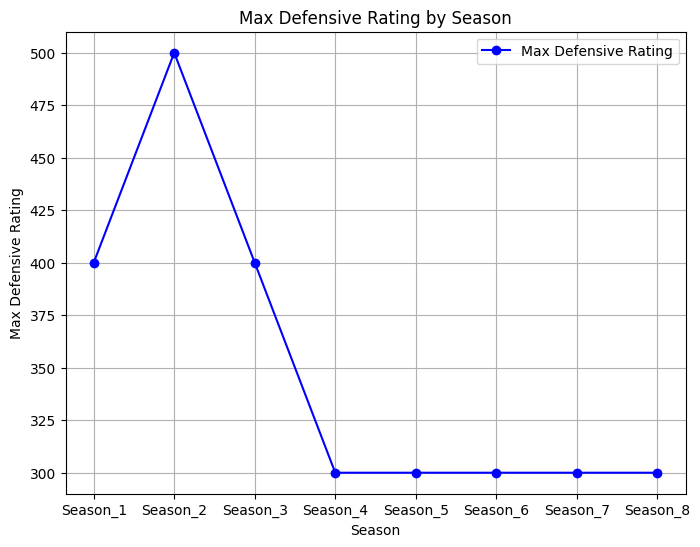

In [46]:
defensive_top5_players= master_train_df_without_dupe_wo_team.groupby(['seasons','player_id']).max('defensive_rating')['defensive_rating']
#top5_players_by_season = defensive_top5_players.nlargest(5)
max_defensive_df= defensive_top5_players.groupby(level=0).max().reset_index(name='max_defensive_rating')

plt.figure(figsize=(8, 6))
plt.plot(max_defensive_df['seasons'], max_defensive_df['max_defensive_rating'], marker='o', color='b', label='Max Defensive Rating')
plt.xlabel('Season')
plt.ylabel('Max Defensive Rating')
plt.title('Max Defensive Rating by Season')
plt.grid(True)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

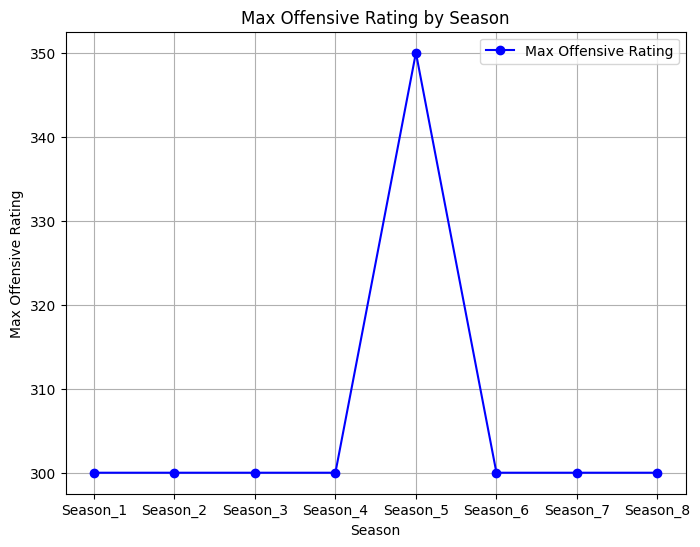

In [47]:
defensive_top5_players= master_train_df_without_dupe_wo_team.groupby(['seasons','player_id']).max('offensive_rating')['offensive_rating']
#top5_players_by_season = defensive_top5_players.nlargest(5)
max_defensive_df= defensive_top5_players.groupby(level=0).max().reset_index(name='max_offensive_rating')

plt.figure(figsize=(8, 6))
plt.plot(max_defensive_df['seasons'], max_defensive_df['max_offensive_rating'], marker='o', color='b', label='Max Offensive Rating')
plt.xlabel('Season')
plt.ylabel('Max Offensive Rating')
plt.title('Max Offensive Rating by Season')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
master_test_df_without_dupe_wo_team['game_date'] = pd.to_datetime(master_test_df_without_dupe_wo_team['game_date'], format='%b %d, %Y')

master_test_df_without_dupe_wo_team['season_year'] = np.where(master_test_df_without_dupe_wo_team['game_date'].dt.month >= 10, 
                                      master_test_df_without_dupe_wo_team['game_date'].dt.year, 
                                      master_test_df_without_dupe_wo_team['game_date'].dt.year - 1)
 
# Step 2: Map each season year to a unique season identifier
# First, get the sorted unique season years
unique_season_years = master_test_df_without_dupe_wo_team['season_year'].unique()
unique_season_years.sort()
 
# Create a mapping from season years to "Season1", "Season2", etc.
season_mapping = {year: f'Season_{i+1}' for i, year in enumerate(unique_season_years)}
 
# Map the 'season_year' to the new 'Seasons' column using the mapping
master_test_df_without_dupe_wo_team['seasons'] = master_test_df_without_dupe_wo_team['season_year'].map(season_mapping)
 
# Example output
master_test_df_without_dupe_wo_team[['game_date', 'season_year', 'seasons']].tail(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,game_date,season_year,seasons
55159,2023-10-25,2023,Season_1
55160,2023-10-25,2023,Season_1
55161,2023-10-25,2023,Season_1
55162,2023-10-25,2023,Season_1
55163,2023-10-25,2023,Season_1


In [49]:
master_train_df_without_dupe_wo_team.head()

,team_id,game_id,game_date,matchup,win_loss,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,...,pace,pace_per_40_minutes,possessions,player_impact_estimate,minutes_played_player_per_game_cln,home_away,status,benched_status,season_year,seasons
0,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,106.60,88.83,60,0.182,27.47,0,unknown,0,2020,Season_6
1,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,102.23,85.20,65,0.087,30.28,0,unknown,0,2020,Season_6
2,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,107.26,89.38,47,0.145,21.03,0,unknown,0,2020,Season_6
3,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,101.30,84.41,58,0.089,27.48,0,unknown,0,2020,Season_6
4,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,99.02,82.52,59,0.089,28.60,0,unknown,0,2020,Season_6


In [50]:
master_test_df_without_dupe_wo_team.head()

,team_id,game_id,game_date,matchup,win_loss,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,...,pace,pace_per_40_minutes,possessions,player_impact_estimate,minutes_played_player_per_game_cln,home_away,status,benched_status,season_year,seasons
0,1610612737,22301010,2024-03-21,ATL @ PHX,L,30.0,39.0,0.435,240,40,...,95.87,79.89,76,0.034,37.55,0,unknown,0,2023,Season_1
1,1610612737,22301010,2024-03-21,ATL @ PHX,L,30.0,39.0,0.435,240,40,...,94.43,78.69,66,0.105,33.55,0,unknown,0,2023,Season_1
2,1610612737,22301010,2024-03-21,ATL @ PHX,L,30.0,39.0,0.435,240,40,...,94.97,79.14,50,0.127,24.77,0,unknown,0,2023,Season_1
3,1610612737,22301010,2024-03-21,ATL @ PHX,L,30.0,39.0,0.435,240,40,...,95.60,79.67,72,0.066,36.15,0,unknown,0,2023,Season_1
4,1610612737,22301010,2024-03-21,ATL @ PHX,L,30.0,39.0,0.435,240,40,...,93.66,78.05,78,0.150,39.72,0,unknown,0,2023,Season_1


In [51]:
master_train_df_without_dupe_wo_team.drop(['season_year','comment','seasons'], axis=1, inplace=True)
master_test_df_without_dupe_wo_team.drop(['season_year','comment','seasons'], axis=1, inplace=True)

In [52]:
master_train_df_without_dupe_wo_team.columns

Index(['team_id', 'game_id', 'game_date', 'matchup', 'win_loss', 'team_wins',
       'team_losses', 'team_win_percentage', 'team_minutes_played',
       'team_field_goals_made', 'team_field_goals_attempted',
       'team_field_goal_percentage', 'team_defensive_rebounds',
       'team_total_rebounds', 'team_assists', 'team_abbreviation', 'team_city',
       'player_id', 'player_name', 'nickname', 'offensive_rating',
       'defensive_rating', 'net_rating', 'assist_percentage',
       'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'pace', 'pace_per_40_minutes', 'possessions',
       'player_impact_estimate', 'minutes_played_player_per_game_cln',
       'home_away', 'status', 'benched_status'],
      dtype='object')

In [53]:
master_train_df_without_dupe_wo_team.head()

,team_id,game_id,game_date,matchup,win_loss,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,...,true_shooting_percentage,usage_percentage,pace,pace_per_40_minutes,possessions,player_impact_estimate,minutes_played_player_per_game_cln,home_away,status,benched_status
0,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,0.546,0.357,106.60,88.83,60,0.182,27.47,0,unknown,0
1,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,0.478,0.195,102.23,85.20,65,0.087,30.28,0,unknown,0
2,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,0.528,0.263,107.26,89.38,47,0.145,21.03,0,unknown,0
3,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,0.625,0.121,101.30,84.41,58,0.089,27.48,0,unknown,0
4,1610612747,22001072,2021-05-16,LAL @ NOP,W,42,30,0.583,240,45,...,0.545,0.169,99.02,82.52,59,0.089,28.60,0,unknown,0


In [54]:
player_game_team_details = master_train_df_without_dupe_wo_team[['team_id','game_id','game_date','matchup',
                                                                 'team_abbreviation','team_city','player_id','player_name','nickname']]

In [55]:
player_game_team_details_test = master_test_df_without_dupe_wo_team[['team_id','game_id','game_date','matchup',
                                                                 'team_abbreviation','team_city','player_id','player_name','nickname']]

In [56]:
player_game_team_details.head()

,team_id,game_id,game_date,matchup,team_abbreviation,team_city,player_id,player_name,nickname
0,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,2544,LeBron James,LeBron
1,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,203076,Anthony Davis,Anthony
2,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,203083,Andre Drummond,Andre
3,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,203484,Kentavious Caldwell-Pope,Kentavious
4,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,203471,Dennis Schroder,Dennis


In [57]:
master_train_df_without_dupe_wo_team.drop(['team_id','game_id','game_date','matchup',
                                           'team_abbreviation','team_city','player_id',
                                           'player_name','nickname'], axis=1, inplace=True)

master_test_df_without_dupe_wo_team.drop(['team_id','game_id','game_date','matchup',
                                           'team_abbreviation','team_city','player_id',
                                           'player_name','nickname'], axis=1, inplace=True)

In [58]:
master_train_df_without_dupe_wo_team.head()

,win_loss,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,team_field_goals_attempted,team_field_goal_percentage,team_defensive_rebounds,team_total_rebounds,...,true_shooting_percentage,usage_percentage,pace,pace_per_40_minutes,possessions,player_impact_estimate,minutes_played_player_per_game_cln,home_away,status,benched_status
0,W,42,30,0.583,240,45,96,0.469,34,42,...,0.546,0.357,106.60,88.83,60,0.182,27.47,0,unknown,0
1,W,42,30,0.583,240,45,96,0.469,34,42,...,0.478,0.195,102.23,85.20,65,0.087,30.28,0,unknown,0
2,W,42,30,0.583,240,45,96,0.469,34,42,...,0.528,0.263,107.26,89.38,47,0.145,21.03,0,unknown,0
3,W,42,30,0.583,240,45,96,0.469,34,42,...,0.625,0.121,101.30,84.41,58,0.089,27.48,0,unknown,0
4,W,42,30,0.583,240,45,96,0.469,34,42,...,0.545,0.169,99.02,82.52,59,0.089,28.60,0,unknown,0


In [59]:
master_train_df_without_dupe_wo_team.reset_index(inplace=True)
player_game_team_details.reset_index(inplace=True)

In [60]:
master_test_df_without_dupe_wo_team.reset_index(inplace=True)
player_game_team_details_test.reset_index(inplace=True)

In [61]:
master_train_df_without_dupe_wo_team.head()
player_game_team_details.head()

,index,team_id,game_id,game_date,matchup,team_abbreviation,team_city,player_id,player_name,nickname
0,0,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,2544,LeBron James,LeBron
1,1,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,203076,Anthony Davis,Anthony
2,2,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,203083,Andre Drummond,Andre
3,3,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,203484,Kentavious Caldwell-Pope,Kentavious
4,4,1610612747,22001072,2021-05-16,LAL @ NOP,LAL,Los Angeles,203471,Dennis Schroder,Dennis


In [62]:
print(master_train_df_without_dupe_wo_team.shape)
print(player_game_team_details.shape)

print(master_test_df_without_dupe_wo_team.shape)
print(player_game_team_details_test.shape)

(454697, 33)
(454697, 10)
(55114, 33)
(55114, 10)


In [63]:
master_train_df_without_dupe_wo_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454697 entries, 0 to 454696
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   index                               454697 non-null  int64  
 1   win_loss                            454697 non-null  object 
 2   team_wins                           454697 non-null  int64  
 3   team_losses                         454697 non-null  int64  
 4   team_win_percentage                 454697 non-null  float64
 5   team_minutes_played                 454697 non-null  int64  
 6   team_field_goals_made               454697 non-null  int64  
 7   team_field_goals_attempted          454697 non-null  int64  
 8   team_field_goal_percentage          454697 non-null  float64
 9   team_defensive_rebounds             454697 non-null  int64  
 10  team_total_rebounds                 454697 non-null  int64  
 11  team_assists              

In [64]:
master_train_df_without_dupe_wo_team.isna().sum()

index                                     0
win_loss                                  0
team_wins                                 0
team_losses                               0
team_win_percentage                       0
team_minutes_played                       0
team_field_goals_made                     0
team_field_goals_attempted                0
team_field_goal_percentage                0
team_defensive_rebounds                   0
team_total_rebounds                       0
team_assists                              0
offensive_rating                          0
defensive_rating                          0
net_rating                                0
assist_percentage                     76353
assist_to_turnover_ratio              76353
assist_ratio                          76353
offensive_rebound_percentage              0
defensive_rebound_percentage              0
rebound_percentage                        0
team_turnover_percentage              76353
effective_field_goal_percentage 

In [65]:
master_train_df_without_dupe_wo_team.fillna(0.0, inplace=True)

master_test_df_without_dupe_wo_team.fillna(0.0, inplace=True)

In [66]:
master_train_df_without_dupe_wo_team.isna().sum()

index                                 0
win_loss                              0
team_wins                             0
team_losses                           0
team_win_percentage                   0
team_minutes_played                   0
team_field_goals_made                 0
team_field_goals_attempted            0
team_field_goal_percentage            0
team_defensive_rebounds               0
team_total_rebounds                   0
team_assists                          0
offensive_rating                      0
defensive_rating                      0
net_rating                            0
assist_percentage                     0
assist_to_turnover_ratio              0
assist_ratio                          0
offensive_rebound_percentage          0
defensive_rebound_percentage          0
rebound_percentage                    0
team_turnover_percentage              0
effective_field_goal_percentage       0
true_shooting_percentage              0
usage_percentage                      0


In [67]:
master_test_df_without_dupe_wo_team.isna().sum()

index                                 0
win_loss                              0
team_wins                             0
team_losses                           0
team_win_percentage                   0
team_minutes_played                   0
team_field_goals_made                 0
team_field_goals_attempted            0
team_field_goal_percentage            0
team_defensive_rebounds               0
team_total_rebounds                   0
team_assists                          0
offensive_rating                      0
defensive_rating                      0
net_rating                            0
assist_percentage                     0
assist_to_turnover_ratio              0
assist_ratio                          0
offensive_rebound_percentage          0
defensive_rebound_percentage          0
rebound_percentage                    0
team_turnover_percentage              0
effective_field_goal_percentage       0
true_shooting_percentage              0
usage_percentage                      0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

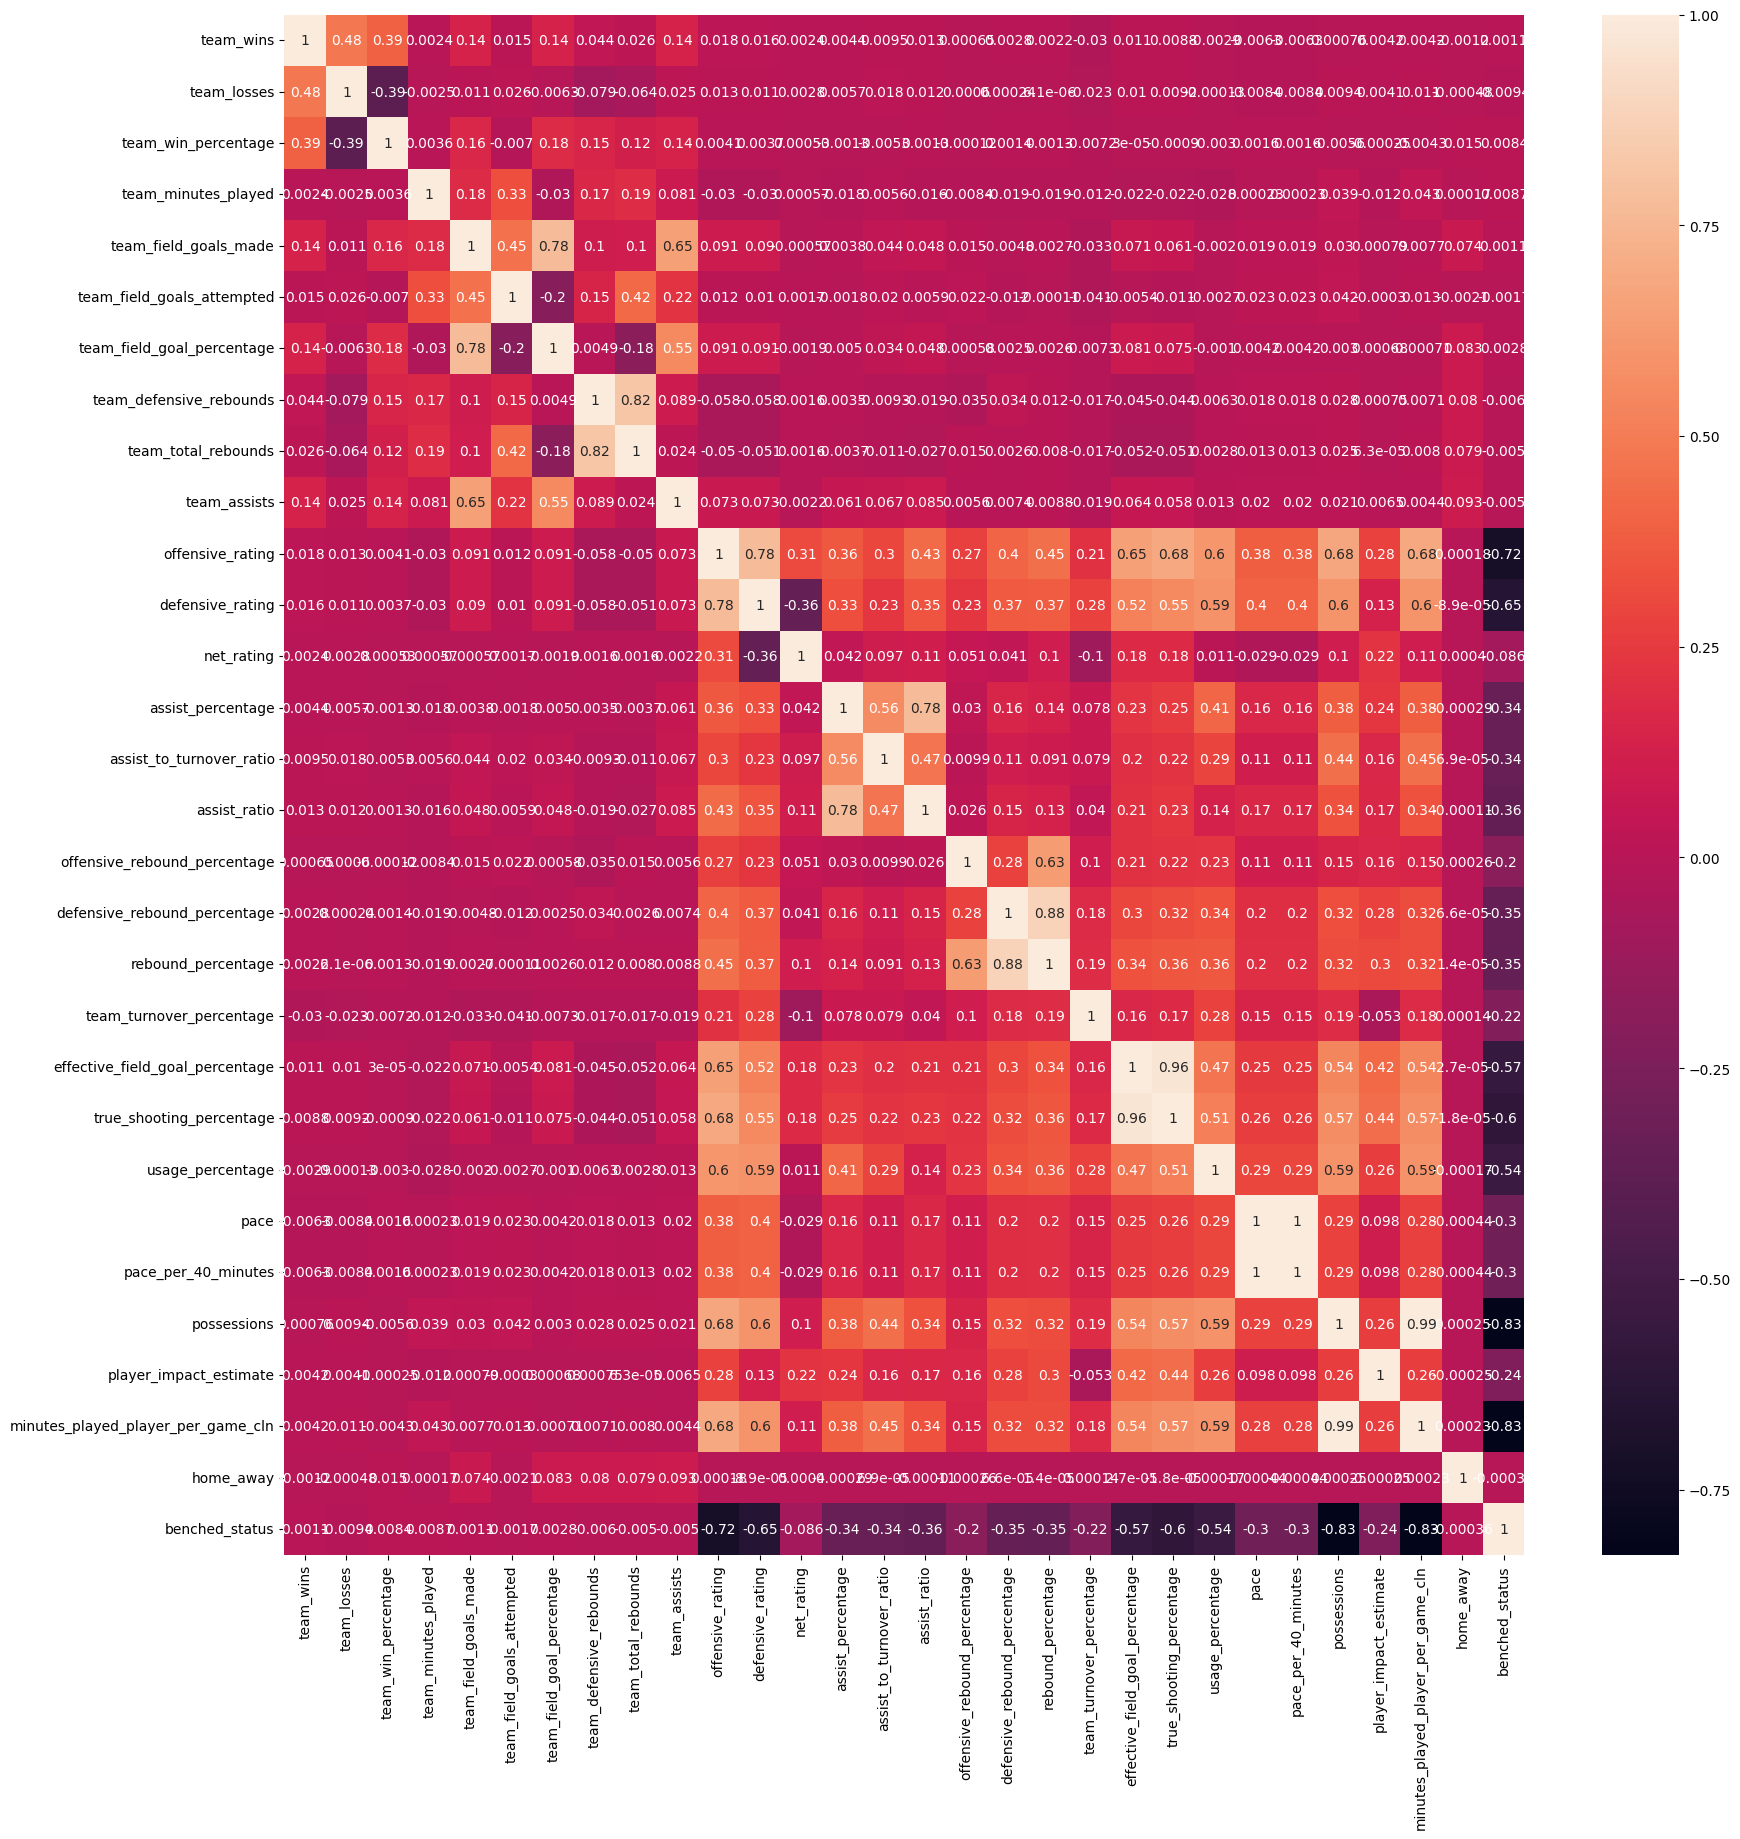

In [68]:
plt.figure(figsize=(20, 20))
sns.heatmap(master_train_df_without_dupe_wo_team.drop('index', axis=1).corr(numeric_only=True), annot=True)

In [69]:
master_train_df_without_dupe_wo_team.columns

Index(['index', 'win_loss', 'team_wins', 'team_losses', 'team_win_percentage',
       'team_minutes_played', 'team_field_goals_made',
       'team_field_goals_attempted', 'team_field_goal_percentage',
       'team_defensive_rebounds', 'team_total_rebounds', 'team_assists',
       'offensive_rating', 'defensive_rating', 'net_rating',
       'assist_percentage', 'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'pace', 'pace_per_40_minutes', 'possessions',
       'player_impact_estimate', 'minutes_played_player_per_game_cln',
       'home_away', 'status', 'benched_status'],
      dtype='object')

Creating target variable(y_train) for training

In [70]:
y=master_train_df_without_dupe_wo_team.win_loss
y_train = pd.Series(np.where(y=="L",0,1))
master_train_df_without_dupe_wo_team.drop(['win_loss'], axis=1, inplace=True)

y_test_intr = master_test_df_without_dupe_wo_team.win_loss
y_test = pd.Series(np.where(y_test_intr=="L",0,1))
master_test_df_without_dupe_wo_team.drop(['win_loss'], axis=1, inplace=True)

# master_train_df_without_dupe_wo_team.drop()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
#master_test_df_without_dupe_wo_team.drop('comment', axis=1, inplace=True)

In [72]:
#master_test_df_without_dupe_wo_team.drop('season_year', axis=1, inplace=True)

In [73]:
master_train_df_without_dupe_wo_team_dum = pd.get_dummies(master_train_df_without_dupe_wo_team, drop_first=True, dtype=int)

master_test_df_without_dupe_wo_team_dum = pd.get_dummies(master_test_df_without_dupe_wo_team, drop_first=True, dtype=int)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
master_train_df_without_dupe_wo_team_dum.columns

Index(['index', 'team_wins', 'team_losses', 'team_win_percentage',
       'team_minutes_played', 'team_field_goals_made',
       'team_field_goals_attempted', 'team_field_goal_percentage',
       'team_defensive_rebounds', 'team_total_rebounds', 'team_assists',
       'offensive_rating', 'defensive_rating', 'net_rating',
       'assist_percentage', 'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'pace', 'pace_per_40_minutes', 'possessions',
       'player_impact_estimate', 'minutes_played_player_per_game_cln',
       'home_away', 'benched_status', 'status_injured', 'status_unknown'],
      dtype='object')

In [75]:
master_test_df_without_dupe_wo_team_dum.columns

Index(['index', 'team_wins', 'team_losses', 'team_win_percentage',
       'team_minutes_played', 'team_field_goals_made',
       'team_field_goals_attempted', 'team_field_goal_percentage',
       'team_defensive_rebounds', 'team_total_rebounds', 'team_assists',
       'offensive_rating', 'defensive_rating', 'net_rating',
       'assist_percentage', 'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'pace', 'pace_per_40_minutes', 'possessions',
       'player_impact_estimate', 'minutes_played_player_per_game_cln',
       'home_away', 'benched_status', 'status_injured', 'status_unknown'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

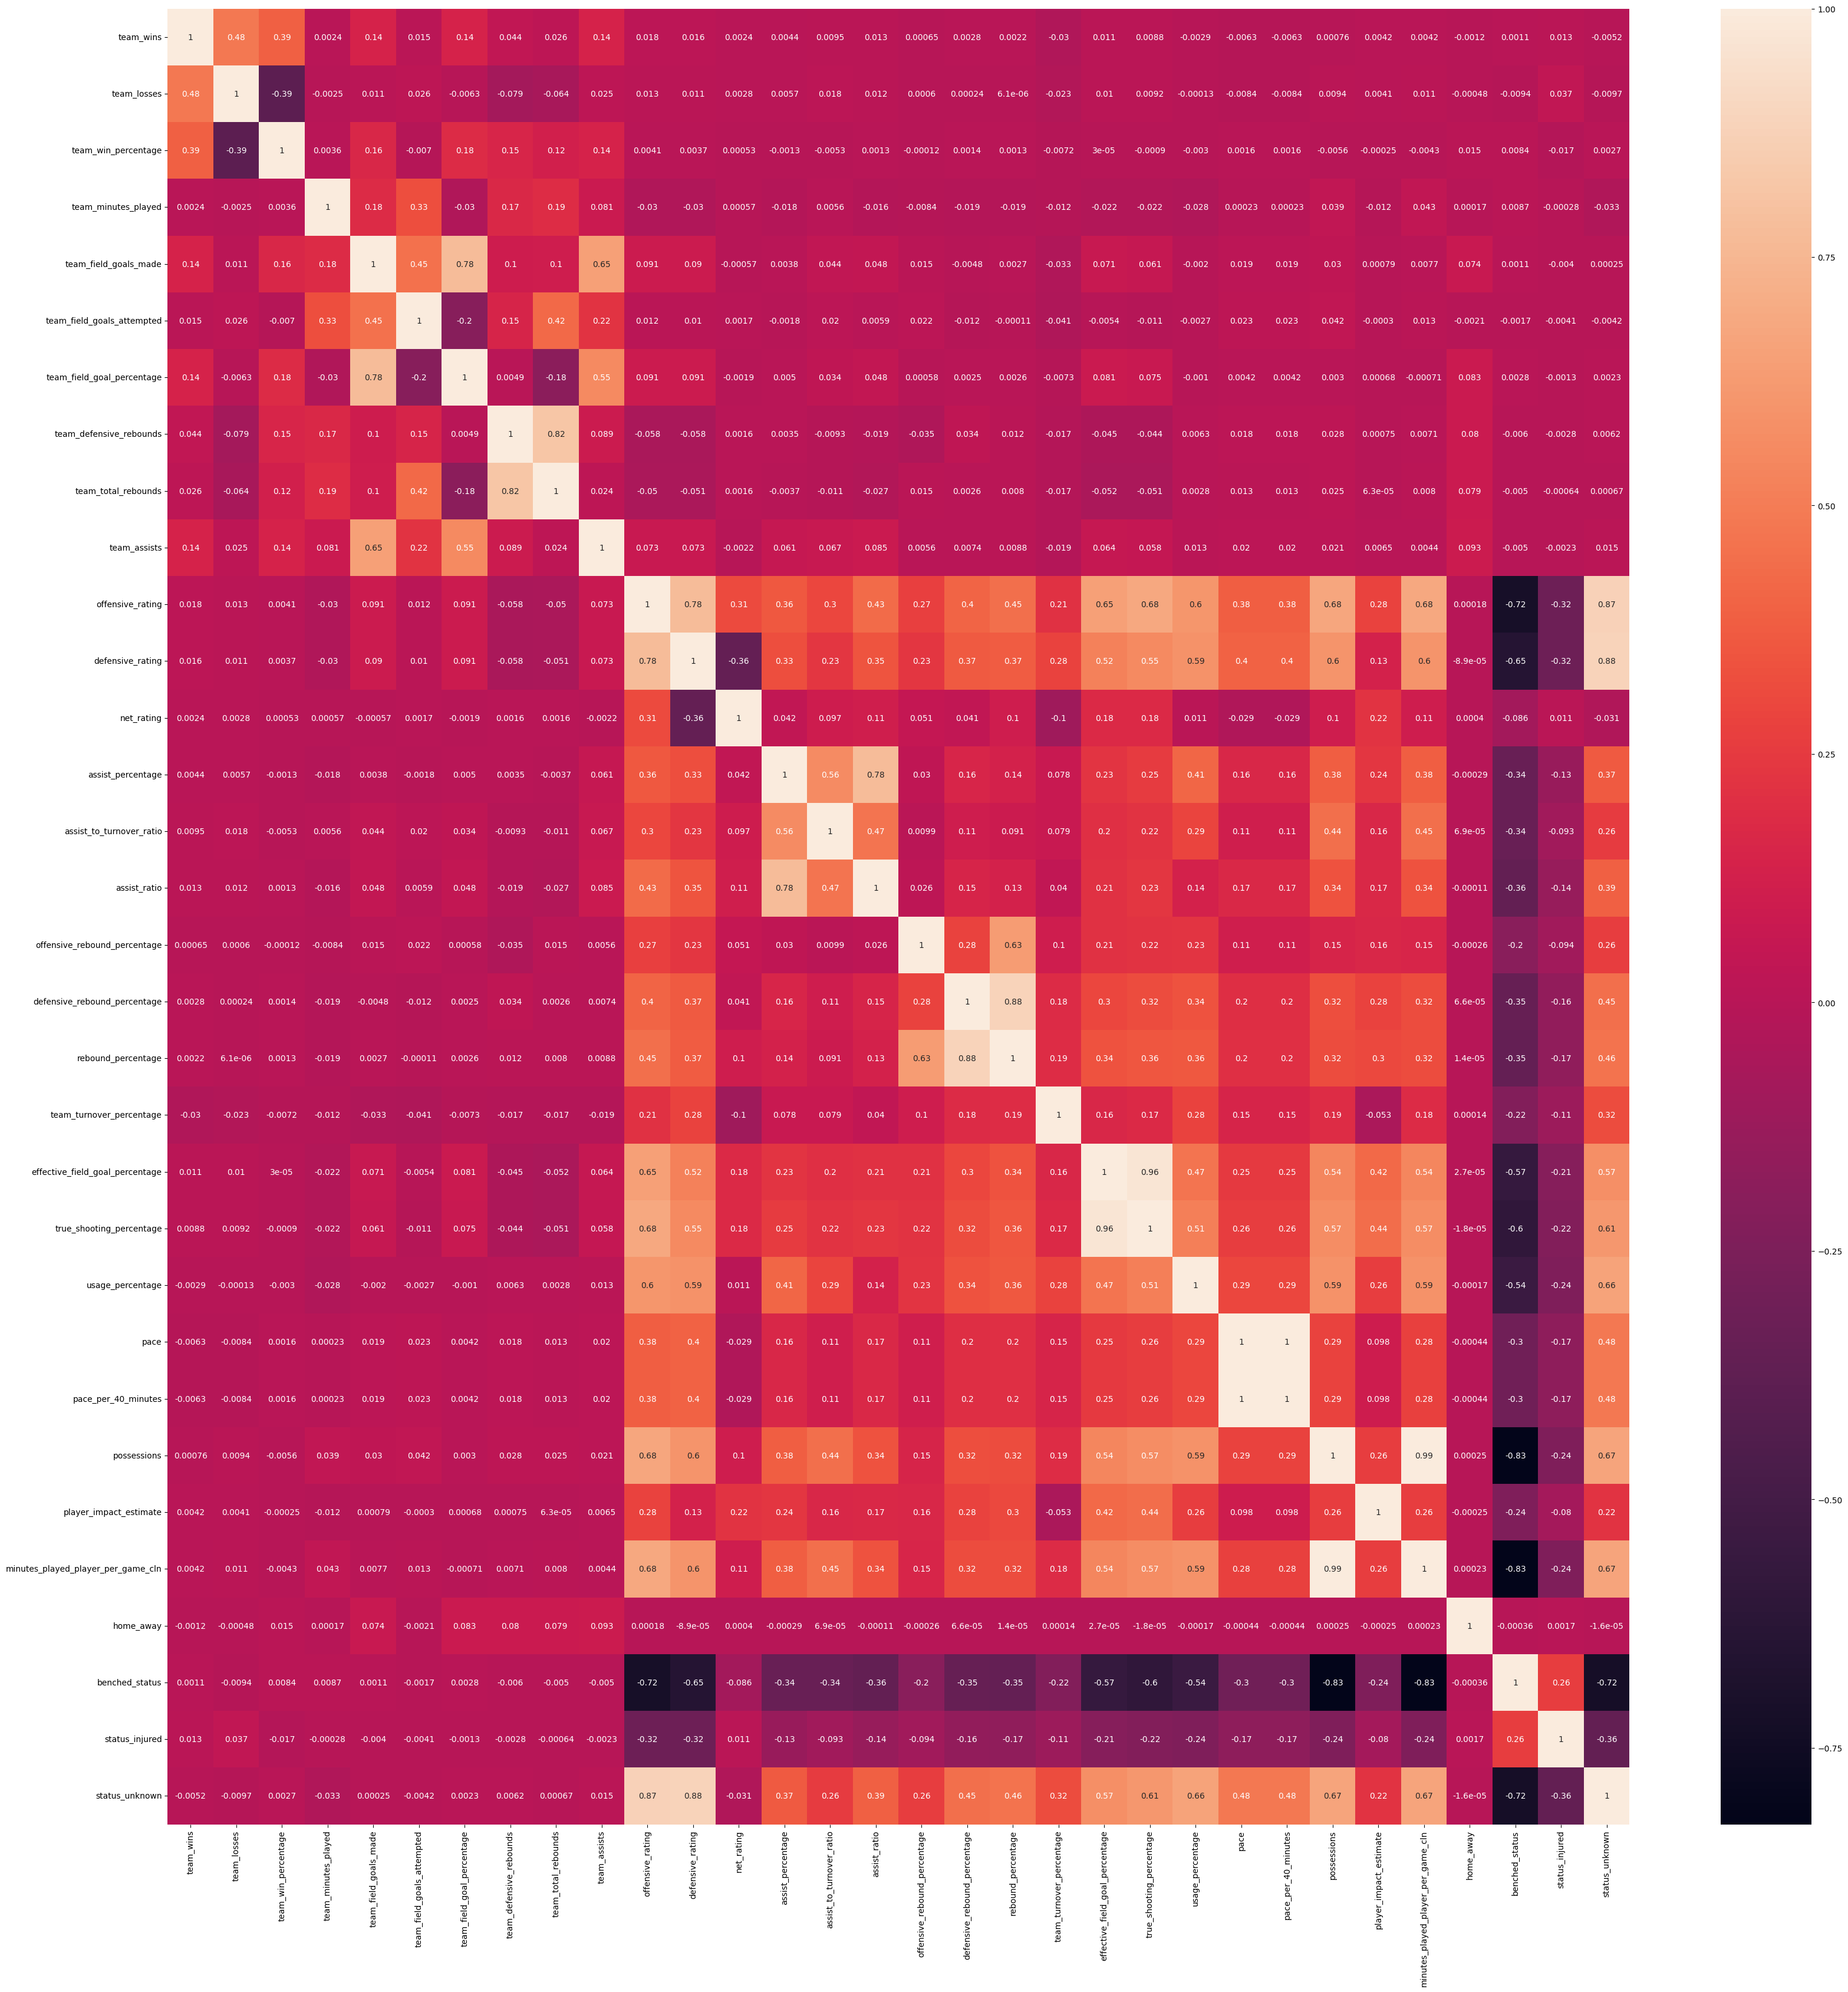

In [76]:
plt.figure(figsize=(40, 40))
sns.heatmap(master_train_df_without_dupe_wo_team_dum.drop('index', axis=1).corr(), annot=True)

In [77]:
# sns.heatmap(master_train_df_without_dupe_wo_team.drop('index', axis=1).corr(), annot=True)
master_train_df_without_dupe_wo_team.head()

,index,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,team_field_goals_attempted,team_field_goal_percentage,team_defensive_rebounds,team_total_rebounds,...,true_shooting_percentage,usage_percentage,pace,pace_per_40_minutes,possessions,player_impact_estimate,minutes_played_player_per_game_cln,home_away,status,benched_status
0,0,42,30,0.583,240,45,96,0.469,34,42,...,0.546,0.357,106.60,88.83,60,0.182,27.47,0,unknown,0
1,1,42,30,0.583,240,45,96,0.469,34,42,...,0.478,0.195,102.23,85.20,65,0.087,30.28,0,unknown,0
2,2,42,30,0.583,240,45,96,0.469,34,42,...,0.528,0.263,107.26,89.38,47,0.145,21.03,0,unknown,0
3,3,42,30,0.583,240,45,96,0.469,34,42,...,0.625,0.121,101.30,84.41,58,0.089,27.48,0,unknown,0
4,4,42,30,0.583,240,45,96,0.469,34,42,...,0.545,0.169,99.02,82.52,59,0.089,28.60,0,unknown,0


In [78]:
y_train.value_counts()

0    227502
1    227195
Name: count, dtype: int64

In [79]:
y_test.value_counts()

1    27639
0    27475
Name: count, dtype: int64

In [80]:
master_train_df_without_dupe_wo_team_dum

,index,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,team_field_goals_attempted,team_field_goal_percentage,team_defensive_rebounds,team_total_rebounds,...,usage_percentage,pace,pace_per_40_minutes,possessions,player_impact_estimate,minutes_played_player_per_game_cln,home_away,benched_status,status_injured,status_unknown
0,0,42,30,0.583,240,45,96,0.469,34,42,...,0.357,106.60,88.83,60,0.182,27.47,0,0,0,1
1,1,42,30,0.583,240,45,96,0.469,34,42,...,0.195,102.23,85.20,65,0.087,30.28,0,0,0,1
2,2,42,30,0.583,240,45,96,0.469,34,42,...,0.263,107.26,89.38,47,0.145,21.03,0,0,0,1
3,3,42,30,0.583,240,45,96,0.469,34,42,...,0.121,101.30,84.41,58,0.089,27.48,0,0,0,1
4,4,42,30,0.583,240,45,96,0.469,34,42,...,0.169,99.02,82.52,59,0.089,28.60,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454692,481306,1,0,1.000,240,48,94,0.511,37,51,...,0.238,100.91,84.09,18,0.024,8.80,0,1,0,1
454693,481307,1,0,1.000,240,48,94,0.511,37,51,...,0.095,100.91,84.09,18,0.202,8.80,0,1,0,1
454694,481308,1,0,1.000,240,48,94,0.511,37,51,...,0.143,100.91,84.09,18,0.155,8.80,0,1,0,1
454695,481309,1,0,1.000,240,48,94,0.511,37,51,...,0.000,0.00,0.00,0,0.000,0.00,0,1,0,0


In [81]:
master_train_df_without_dupe_wo_team_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454697 entries, 0 to 454696
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   index                               454697 non-null  int64  
 1   team_wins                           454697 non-null  int64  
 2   team_losses                         454697 non-null  int64  
 3   team_win_percentage                 454697 non-null  float64
 4   team_minutes_played                 454697 non-null  int64  
 5   team_field_goals_made               454697 non-null  int64  
 6   team_field_goals_attempted          454697 non-null  int64  
 7   team_field_goal_percentage          454697 non-null  float64
 8   team_defensive_rebounds             454697 non-null  int64  
 9   team_total_rebounds                 454697 non-null  int64  
 10  team_assists                        454697 non-null  int64  
 11  offensive_rating          

In [82]:
master_train_df_without_dupe_wo_team_dum.drop('index', axis=1).columns

Index(['team_wins', 'team_losses', 'team_win_percentage',
       'team_minutes_played', 'team_field_goals_made',
       'team_field_goals_attempted', 'team_field_goal_percentage',
       'team_defensive_rebounds', 'team_total_rebounds', 'team_assists',
       'offensive_rating', 'defensive_rating', 'net_rating',
       'assist_percentage', 'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'pace', 'pace_per_40_minutes', 'possessions',
       'player_impact_estimate', 'minutes_played_player_per_game_cln',
       'home_away', 'benched_status', 'status_injured', 'status_unknown'],
      dtype='object')

#### Logical Regression for Model1

In [83]:
from sklearn.ensemble import RandomForestClassifier # For classification problems
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train = master_train_df_without_dupe_wo_team_dum.drop('index', axis=1)
scaler = StandardScaler()
X_train_scaled_intr = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_intr, columns=master_train_df_without_dupe_wo_team_dum.drop('index', axis=1).columns)

X_test = master_test_df_without_dupe_wo_team_dum.drop('index', axis=1)
X_test_scaled_intr = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_intr, columns=master_test_df_without_dupe_wo_team_dum.drop('index', axis=1).columns)


lr = LogisticRegression(solver='newton-cg', max_iter=300)
lr.fit(X_train_scaled,y_train)

y_pred_lr = lr.predict(X_test_scaled)

accuracy_lr_mdl1= accuracy_score(y_true=y_test, y_pred=y_pred_lr)

print("Accuracy for Logistic regression:", accuracy_lr_mdl1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy for Logistic regression: 0.826849802228109


#### Random Forest Classifier for Model1

In [84]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf= rf.predict(X_test)

accuracy_rf_mdl1= accuracy_score(y_true=y_test, y_pred=y_pred_rf)

print("Accuracy for Random Forest:", accuracy_rf_mdl1)

Accuracy for Random Forest: 0.8134230866930362


Feature Ranking for Random forest

In [84]:
feature_importances = rf.feature_importances_
df_feature_importance_mdl1 = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importances})
df_feature_importance_mdl1 = df_feature_importance_mdl1.sort_values(by='Importance', ascending=False)

print(df_feature_importance_mdl1)

<IPython.core.display.Javascript object>

                               Feature  Importance
6           team_field_goal_percentage    0.171584
2                  team_win_percentage    0.126319
7              team_defensive_rebounds    0.108446
8                  team_total_rebounds    0.096799
4                team_field_goals_made    0.090223
1                          team_losses    0.067997
9                         team_assists    0.067018
0                            team_wins    0.064007
5           team_field_goals_attempted    0.061284
28                           home_away    0.015235
23                                pace    0.013084
24                 pace_per_40_minutes    0.013005
10                    offensive_rating    0.010416
11                    defensive_rating    0.010411
3                  team_minutes_played    0.008775
12                          net_rating    0.008266
27  minutes_played_player_per_game_cln    0.008029
25                         possessions    0.006943
26              player_impact_e

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

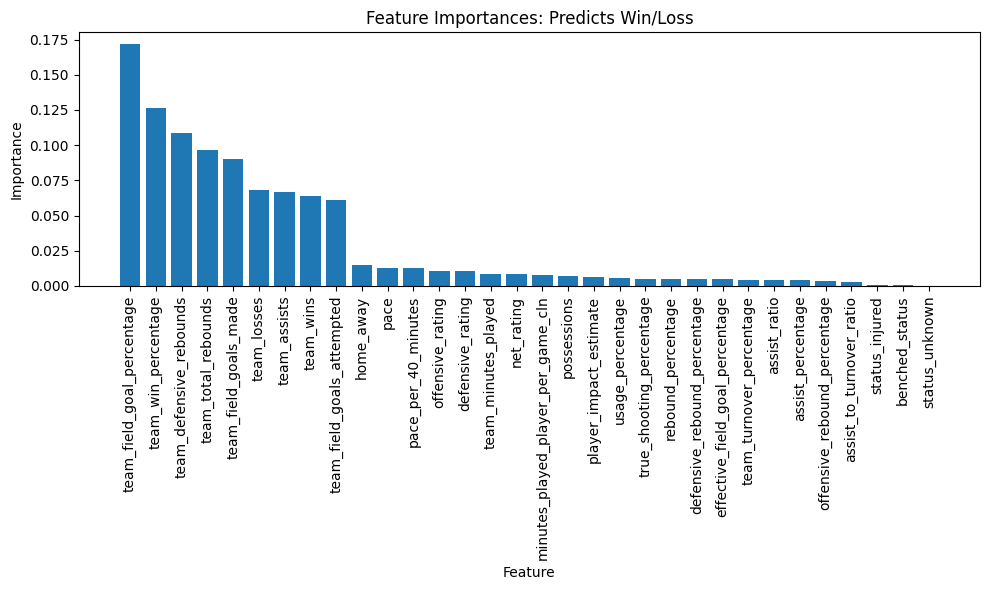

In [87]:
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances: Predicts Win/Loss')
plt.tight_layout()
plt.show()

In [87]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

accuracy_nb_mdl1= accuracy_score(y_true=y_test, y_pred=y_pred_nb)
print("Accuracy for Naive Bayes: ", accuracy_nb_mdl1)

Accuracy for Naive Bayes:  0.7863700693108829


Calculating a cross-val score for the best performing model: Logistic Regression

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

f1_scorer = make_scorer(f1_score, average='weighted')
model1_scores_cv = cross_val_score(lr, X_train_scaled, y_train, scoring=f1_scorer, cv=10)

print(model1_scores_cv)

print(np.mean(model1_scores_cv))


[0.80348859 0.79915856 0.80908893 0.80597479 0.80048026 0.7992057
 0.79143427 0.78668404 0.81341858 0.77814208]
0.7987075803757374


<IPython.core.display.Javascript object>

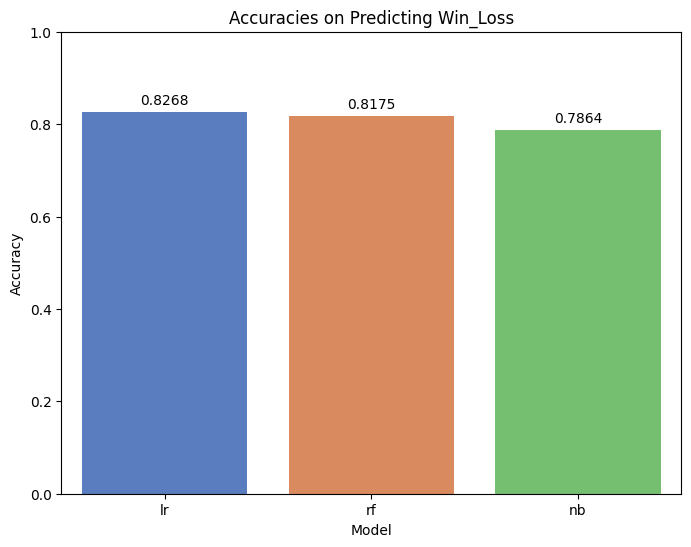

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a DataFrame
models= ['lr','rf','nb']
accuracies= [accuracy_lr_mdl1, accuracy_rf_mdl1,accuracy_nb_mdl1]

accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='muted', hue='Model')

for i, v in enumerate(accuracy_df['Accuracy']):
    plt.text(i, v + 0.01, str(round(v,4)), ha='center', va='bottom')
plt.title('Accuracies on Predicting Win_Loss')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()


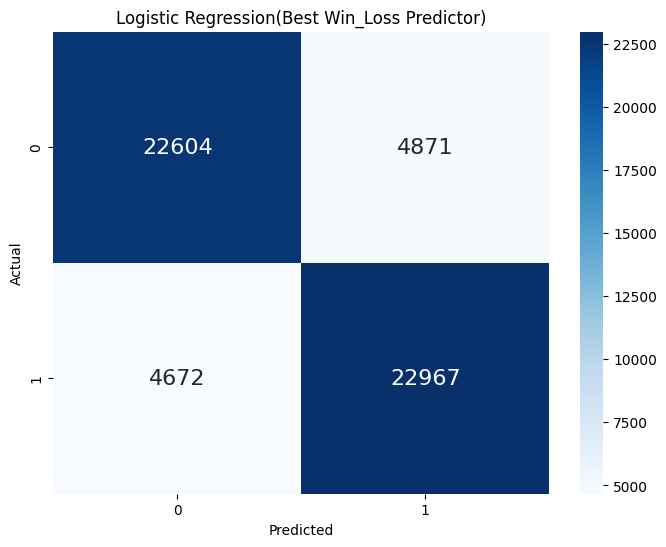

In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
plt.title('Logistic Regression(Best Win_Loss Predictor)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best parameters found: {'C': 10, 'penalty': 'l2'}
Best accuracy score: 0.7990529708402427
Accuracy on test set: 0.8268679464382915


In [ ]:
"""rf = RandomForestClassifier(n_estimators=100, random_state=42)
#  Training the model
rf.fit(X_train, y_train)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)"""

#### Model 2: Predicts whether the player will be benched or not

We will now train the model to predict when a player should be benched in the season in our test dataset.

In [85]:
master_train_df_without_dupe_wo_team_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454697 entries, 0 to 454696
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   index                               454697 non-null  int64  
 1   team_wins                           454697 non-null  int64  
 2   team_losses                         454697 non-null  int64  
 3   team_win_percentage                 454697 non-null  float64
 4   team_minutes_played                 454697 non-null  int64  
 5   team_field_goals_made               454697 non-null  int64  
 6   team_field_goals_attempted          454697 non-null  int64  
 7   team_field_goal_percentage          454697 non-null  float64
 8   team_defensive_rebounds             454697 non-null  int64  
 9   team_total_rebounds                 454697 non-null  int64  
 10  team_assists                        454697 non-null  int64  
 11  offensive_rating          

In [86]:
cols_to_drop_mdl2= ['index','status_injured','status_unknown', 'offensive_rating','defensive_rating', 'minutes_played_player_per_game_cln']
master_train_df_mdl2= master_train_df_without_dupe_wo_team_dum.drop(columns=cols_to_drop_mdl2)
print(master_train_df_mdl2.shape)

master_test_df_mdl2= master_test_df_without_dupe_wo_team_dum.drop(columns=cols_to_drop_mdl2)
print(master_test_df_mdl2.shape)

(454697, 27)
(55114, 27)


In [87]:
master_train_df_mdl2['game_won'] = y_train

In [88]:
master_test_df_mdl2['game_won'] = y_test

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

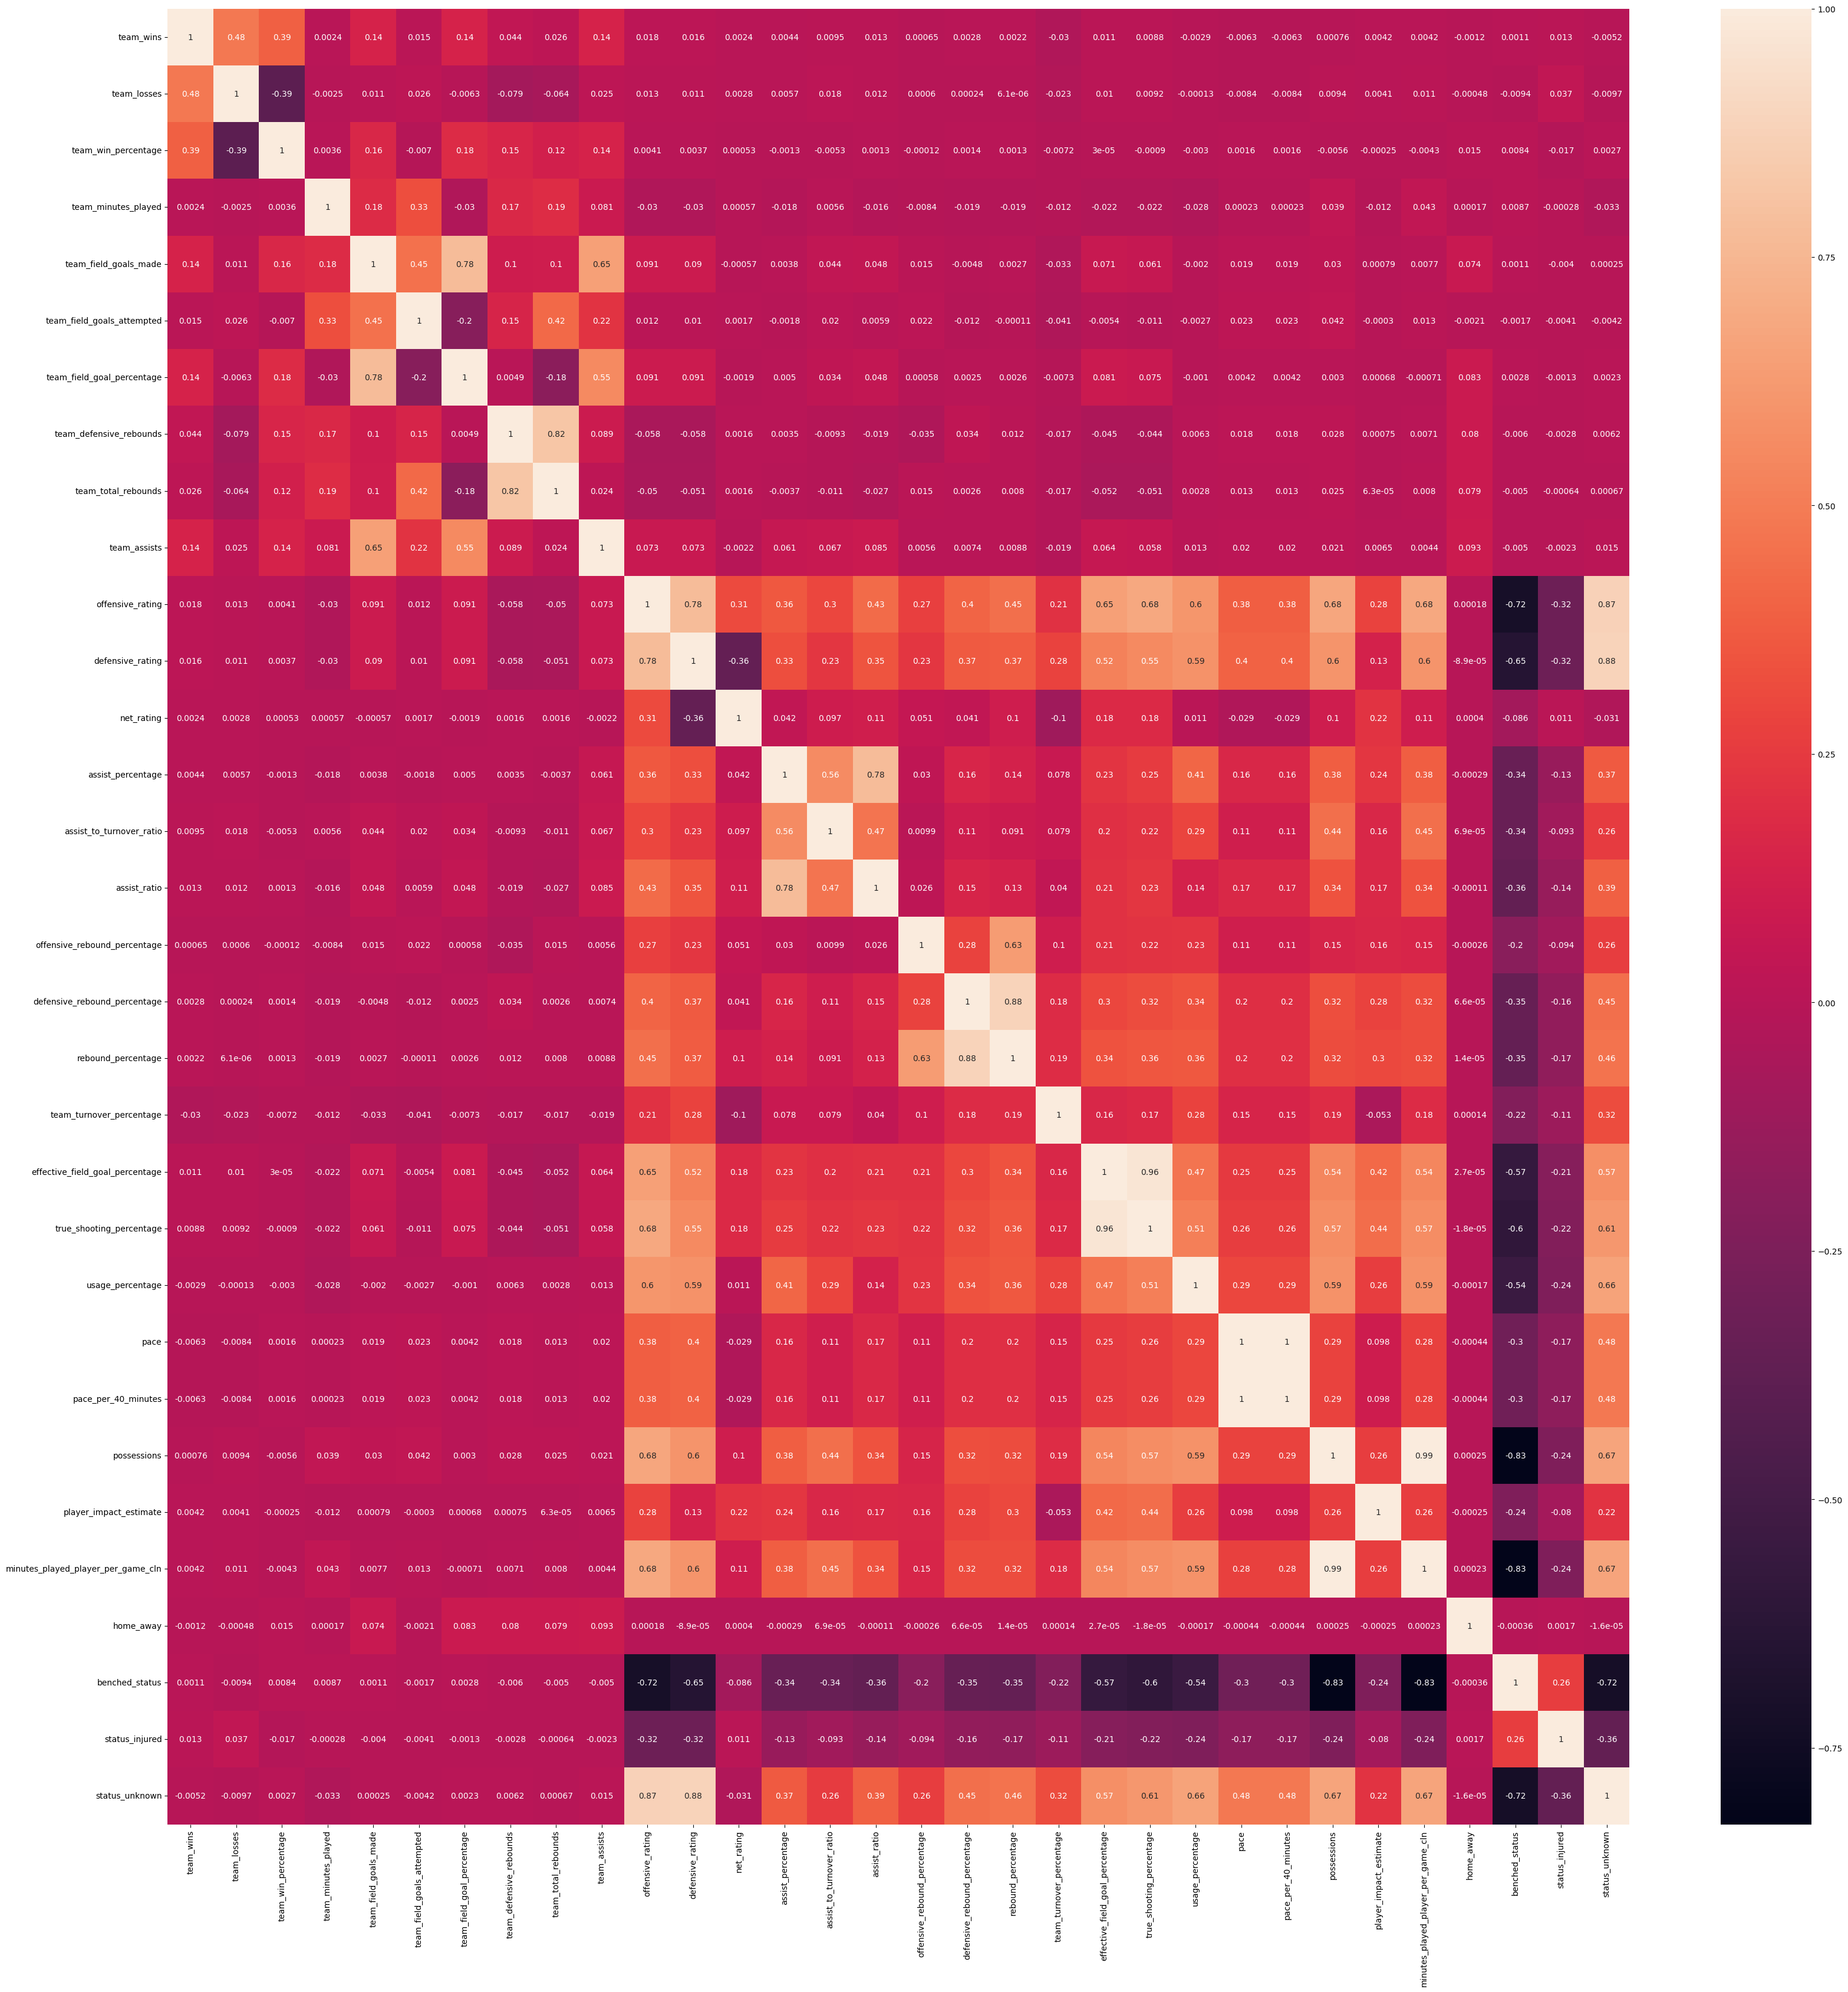

In [89]:
# correlation
plt.figure(figsize=(40, 40))
sns.heatmap(master_train_df_without_dupe_wo_team_dum.drop('index', axis=1).corr(), annot=True)

In [90]:
master_train_df_mdl2.head()

,team_wins,team_losses,team_win_percentage,team_minutes_played,team_field_goals_made,team_field_goals_attempted,team_field_goal_percentage,team_defensive_rebounds,team_total_rebounds,team_assists,...,effective_field_goal_percentage,true_shooting_percentage,usage_percentage,pace,pace_per_40_minutes,possessions,player_impact_estimate,home_away,benched_status,game_won
0,42,30,0.583,240,45,96,0.469,34,42,30,...,0.545,0.546,0.357,106.60,88.83,60,0.182,0,0,1
1,42,30,0.583,240,45,96,0.469,34,42,30,...,0.417,0.478,0.195,102.23,85.20,65,0.087,0,0,1
2,42,30,0.583,240,45,96,0.469,34,42,30,...,0.545,0.528,0.263,107.26,89.38,47,0.145,0,0,1
3,42,30,0.583,240,45,96,0.469,34,42,30,...,0.625,0.625,0.121,101.30,84.41,58,0.089,0,0,1
4,42,30,0.583,240,45,96,0.469,34,42,30,...,0.545,0.545,0.169,99.02,82.52,59,0.089,0,0,1


Preparing the data for modelling:

In [91]:
X_train_mdl2 = master_train_df_mdl2.drop('benched_status', axis= 1)
y_train_mdl2 = master_train_df_mdl2.benched_status

X_test_mdl2 = master_test_df_mdl2.drop('benched_status', axis= 1)
y_test_mdl2 = master_test_df_mdl2.benched_status

Checking the Variance Inflation Factor for multicollinearity amongst the variables in use for training the model

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = master_train_df_mdl2.columns
vif_data["VIF"] = [variance_inflation_factor(master_train_df_mdl2.values, i) for i in range(master_train_df_mdl2.shape[1])]

print(vif_data)


In [99]:
scaler.fit_transform(X_train_mdl2).shape, y_train_mdl2.shape

((454697, 27), (454697,))

#### Logistic Regression

In [105]:
#lr = LogisticRegression(solver='newton-cg', max_iter=300)
scaler= StandardScaler()
X_train_scaled_mdl2 = scaler.fit_transform(X_train_mdl2)
X_test_scaled_mdl2 = scaler.fit_transform(X_test_mdl2)


In [107]:
X_train_scaled_mdl2.shape,X_test_scaled_mdl2.shape

((454697, 27), (55114, 27))

In [108]:
lr2= LogisticRegression()
lr2.fit(X_train_scaled_mdl2,y_train_mdl2)
y_pred_benched_lr = lr2.predict(X_test_scaled_mdl2)

accuracy_lr_mdl2= accuracy_score(y_true=y_test_mdl2, y_pred=y_pred_benched_lr)
print("Accuracy for Logistic regression:",accuracy_lr_mdl2)

Accuracy for Logistic regression: 0.9842145371411982


#### Random Forest

In [94]:
rf = RandomForestClassifier()
rf.fit(X_train_mdl2, y_train_mdl2)
y_pred_benched_rf= rf.predict(X_test_mdl2)

accuracy_rf_mdl2= accuracy_score(y_true=y_test_mdl2, y_pred=y_pred_benched_rf)
print("Accuracy for Random Forest", accuracy_rf_mdl2)
                              

Accuracy for Random Forest 0.996207860071851


Feature Importance ranking for Random Forest

In [100]:
feature_importances_mdl2 = rf.feature_importances_
df_feature_importance = pd.DataFrame({'Feature': X_train_mdl2.columns, 'Importance': feature_importances_mdl2})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

print(df_feature_importance)

<IPython.core.display.Javascript object>

                            Feature  Importance
23                      possessions    0.394626
19         true_shooting_percentage    0.118948
18  effective_field_goal_percentage    0.089593
16               rebound_percentage    0.082606
20                 usage_percentage    0.070352
15     defensive_rebound_percentage    0.058102
22              pace_per_40_minutes    0.057888
21                             pace    0.038528
11                assist_percentage    0.029293
13                     assist_ratio    0.017291
24           player_impact_estimate    0.015176
17         team_turnover_percentage    0.008356
10                       net_rating    0.005341
14     offensive_rebound_percentage    0.004338
12         assist_to_turnover_ratio    0.002658
1                       team_losses    0.000819
0                         team_wins    0.000803
5        team_field_goals_attempted    0.000799
6        team_field_goal_percentage    0.000767
2               team_win_percentage    0

Visualizing the feature importances:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

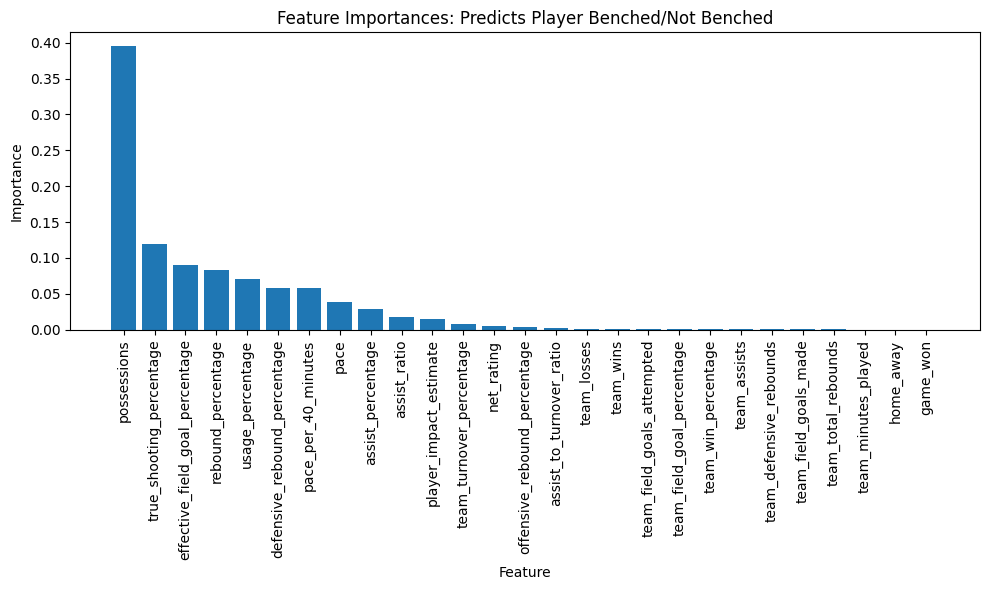

In [103]:
sorted_indices = feature_importances_mdl2.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_mdl2)), feature_importances_mdl2[sorted_indices], align='center')
plt.xticks(range(len(feature_importances_mdl2)), X_train_mdl2.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances: Predicts Player Benched/Not Benched')
plt.tight_layout()
plt.show()

#### Naive Bayes Classifer

In [95]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_scaled_mdl2, y_train_mdl2)
y_pred_benched_nb = nb.predict(X_test_scaled_mdl2)

accuracy_nb_mdl2= accuracy_score(y_true=y_test_mdl2, y_pred=y_pred_benched_lr)
print("Accuracy for Naive Bayes: ", accuracy_nb_mdl2)

Accuracy for Naive Bayes:  0.9843234024022934


Cross-val score for the best model:

Random-forest classification

In [102]:
model2_scores_cv = cross_val_score(rf, X_train_scaled_mdl2, y_train_mdl2,scoring=f1_scorer, cv=5)

print(model2_scores_cv)

print(np.mean(model2_scores_cv))

[0.99808653 0.99782335 0.99780123 0.99809743 0.99793263]
0.997948234650479


<IPython.core.display.Javascript object>

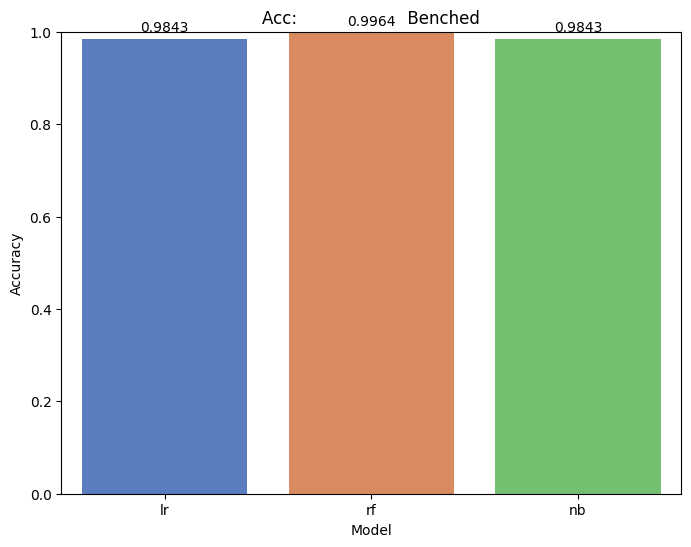

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a DataFrame
model2_list= ['lr','rf','nb']
accuracies_mdl2= [accuracy_lr_mdl2, accuracy_rf_mdl2,accuracy_nb_mdl2]

accuracy_df_mdl2 = pd.DataFrame({'Model': model2_list, 'Accuracy': accuracies_mdl2})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df_mdl2, palette='muted', hue='Model')

for i, v in enumerate(accuracy_df_mdl2['Accuracy']):
    plt.text(i, v + 0.01, str(round(v,4)), ha='center', va='bottom')
plt.title('Acc:                     Benched')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()


#### Confusion matrix for the best model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

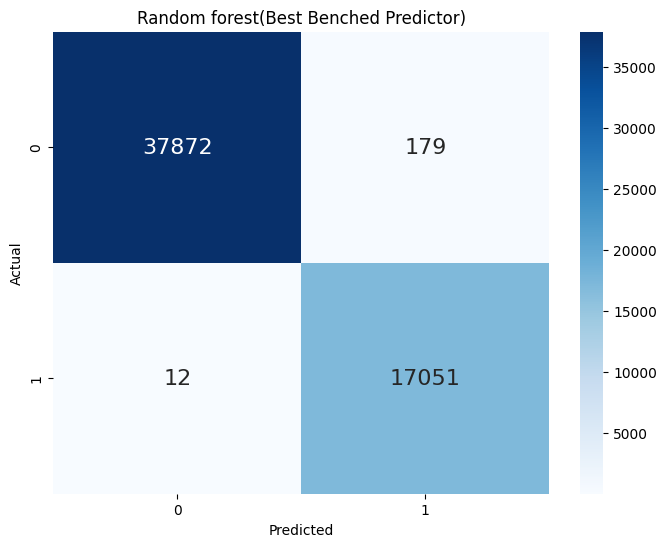

In [96]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_mdl2, y_pred_benched_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
plt.title('Random forest(Best Benched Predictor)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Basic Vizualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a DataFrame
models= ['lr','rf','nb']
accuracies= [accuracy_lr_mdl1, accuracy_rf_mdl1,accuracy_nb_mdl1]

accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='muted', hue='Model')

for i, v in enumerate(accuracy_df['Accuracy']):
    plt.text(i, v + 0.01, str(round(v,4)), ha='center', va='bottom')
plt.title('Accuracies on Predicting Win_Loss')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()


Index(['index', 'team_wins', 'team_losses', 'team_win_percentage',
       'team_minutes_played', 'team_field_goals_made',
       'team_field_goals_attempted', 'team_field_goal_percentage',
       'team_defensive_rebounds', 'team_total_rebounds', 'team_assists',
       'offensive_rating', 'defensive_rating', 'net_rating',
       'assist_percentage', 'assist_to_turnover_ratio', 'assist_ratio',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'rebound_percentage', 'team_turnover_percentage',
       'effective_field_goal_percentage', 'true_shooting_percentage',
       'usage_percentage', 'pace', 'pace_per_40_minutes', 'possessions',
       'player_impact_estimate', 'minutes_played_player_per_game_cln',
       'home_away', 'status', 'benched_status'],
      dtype='object')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Sort the data by wins and select the top 4 teams
top_4_teams = data.sort_values(by='Wins', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Wins', data=top_4_teams, palette='Set1')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Number of Wins for Top 4 Teams')
plt.show()


/tmp/ipykernel_76753/1994312624.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Wins', data=top_4_teams, palette='Set1')


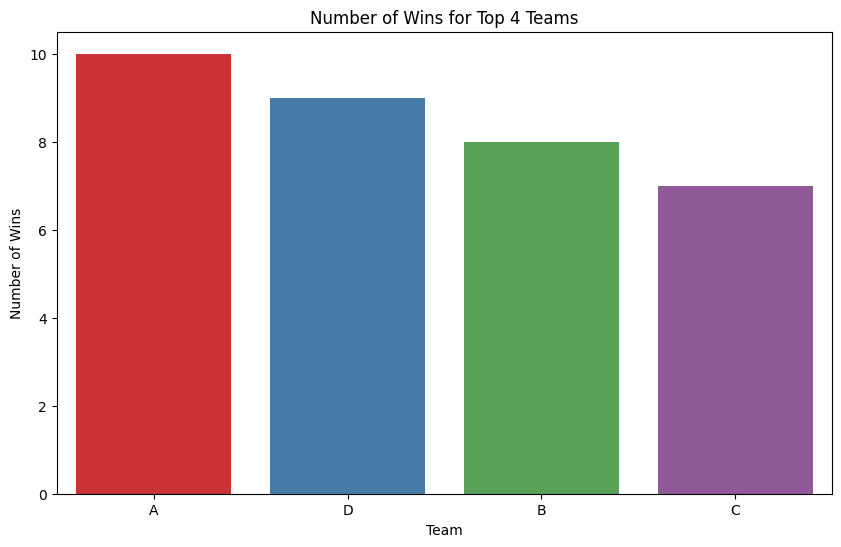

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'Team': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],  # Team abbreviation
    'Wins': [10, 8, 7, 9, 6, 5, 4, 3]  # Number of wins
})

# Sort the data by wins and select the top 4 teams
top_4_teams = data.sort_values(by='Wins', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Wins', data=top_4_teams, palette='Set1')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Number of Wins for Top 4 Teams')
plt.show()
